Nombre : Gozde Yazganoglu 
email : gozde.yazganoglu@cunef.edu
git : https://github.com/gozdeydd

Nombre: Irma Sanchez
...

The Insurance Company Benchmark (COIL 2000)

Tipo de datos: multivariante

Resumen:

Este conjunto de datos utilizado en CoIL 2000 Challenge contiene información sobre los clientes de una compañía de seguros. Los datos consisten en 86 variables e incluyen datos de uso de productos y datos sociodemográficos derivados de códigos postales. Los datos se recopilaron para responder a la siguiente pregunta: ¿Puede predecir quién estaría interesado en comprar una póliza de seguro de caravana y dar una explicación de por qué?

Fuentes:

Propietario original y donante:

Peter van der Putten

Investigación de máquinas inteligentes

Baarsjesweg 224 1058 AA Ámsterdam Los países bajos +31 20 6186927

pvdputten@hotmail.com, putten@liacs.nl

Página de inicio de TIC Benchmark

Fecha de donación: 7 de marzo de 2000

Características de los datos:

La información sobre los clientes consta de 86 variables e incluye datos de uso del producto y datos sociodemográficos derivados de los códigos postales. Los datos fueron proporcionados por la empresa holandesa de minería de datos Sentient Machine Research y se basan en un problema empresarial del mundo real. El conjunto de capacitación contiene más de 5000 descripciones de clientes, incluida la información de si tienen o no una póliza de seguro de caravana. Un conjunto de prueba contiene 4000 clientes de los cuales solo los organizadores saben si tienen una póliza de seguro de caravana.

El diccionario de datos describe las variables utilizadas y sus valores.

Nota: Todas las variables que comienzan con M son variables de código postal. Dan información sobre la distribución de esa variable, p. Casa alquilada, en el área del código postal del cliente.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sweetviz as sv
import seaborn as sns
import IPython


In [ ]:
data_dict = pd.read_excel('dictionary.xl')

In [3]:
data_train = pd.read_table ('ticdata2000.txt', header=None)
data_test = pd.read_table ('ticeval2000.txt', header=None)

In [4]:
data_train.columns= ['1_cust_subtype','2_num_houses','3_avg_hh_size','4_avg_age','5_cust_type',
        '6_rel_cat','7_rel_prot','8_rel_other','9_rel_none','10_mar_maried',
        '11_mar_liv_tog','12_mar_other','13_mar_single','14_hh_woclild','15_hh_child',
        '16_educ_high','17_educ_med','18_educ_low','19_ocup_high','20_ocup_entp',
        '21_ocup_farmer','22_ocup_mid_man','23_ocup_skilled','24_ocup_unskilled','25_sc_a',
        '26_sc_b1','27_sc_b2','28_sc_c','29_sc_d','30_home_rent',
        '31_home_ovner','32_car_1','33_car_2','34_car_0','35_health_pub', 
        '36_health_priv','37_income_30','38_income_45','39_income_75','40_income_122',
        '41_income_more','42_income_avg','43_purc_class','44_ins_amnt_3rd','45_ins_firms',
        '46_ins_agr','47_ins_car','48_ins_van','49_ins_moto','50_ins_lorry',
        '51_ins_trailer','52_ins_tractors','53_ins_agr_mach','54_ins_moped','55_ins_life',
        '56_ins_acc_pri','57_ins_acc_fam','58_ins_disab','59_ins_fire','60_ins_surf',
        '61_ins_boat','62_ins_bike','63_ins_property','64_ins_socsec','65_num_ins_3rd',
        '66_num_ins_firms','67_num_ins_agr','68_num_ins_car','69_num_ins_van','70_num_ins_moto',
        '71_num_ins_lorry','72_num_ins_trailer','73_num_ins_tractor','74_num_ins_agrmac','75_num_ins_moped',
        '76_num_ins_life','77_num_ins_acc_pri','78_num_ins_acc_fam','79_num_ins_disab','80_num_ins_fire',
        '81_num_ins_surf','82_num_ins_boat','83_num_ins_bike','84_num_ins_property','85_num_ins_socsec',
        '86_num_ins_caravan']


Datos de evaluacion no tiene variable de objectivo. Ahora mismo no nos falta pero habra que crear otra lista de columnas sin variable independiente.

In [5]:
data_test.columns= ['1_cust_subtype','2_num_houses','3_avg_hh_size','4_avg_age','5_cust_type',
        '6_rel_cat','7_rel_prot','8_rel_other','9_rel_none','10_mar_maried',
        '11_mar_liv_tog','12_mar_other','13_mar_single','14_hh_woclild','15_hh_child',
        '16_educ_high','17_educ_med','18_educ_low','19_ocup_high','20_ocup_entp',
        '21_ocup_farmer','22_ocup_mid_man','23_ocup_skilled','24_ocup_unskilled','25_sc_a',
        '26_sc_b1','27_sc_b2','28_sc_c','29_sc_d','30_home_rent',
        '31_home_ovner','32_car_1','33_car_2','34_car_0','35_health_pub', 
        '36_health_priv','37_income_30','38_income_45','39_income_75','40_income_122',
        '41_income_more','42_income_avg','43_purc_class','44_ins_amnt_3rd','45_ins_firms',
        '46_ins_agr','47_ins_car','48_ins_van','49_ins_moto','50_ins_lorry',
        '51_ins_trailer','52_ins_tractors','53_ins_agr_mach','54_ins_moped','55_ins_life',
        '56_ins_acc_pri','57_ins_acc_fam','58_ins_disab','59_ins_fire','60_ins_surf',
        '61_ins_boat','62_ins_bike','63_ins_property','64_ins_socsec','65_num_ins_3rd',
        '66_num_ins_firms','67_num_ins_agr','68_num_ins_car','69_num_ins_van','70_num_ins_moto',
        '71_num_ins_lorry','72_num_ins_trailer','73_num_ins_tractor','74_num_ins_agrmac','75_num_ins_moped',
        '76_num_ins_life','77_num_ins_acc_pri','78_num_ins_acc_fam','79_num_ins_disab','80_num_ins_fire',
        '81_num_ins_surf','82_num_ins_boat','83_num_ins_bike','84_num_ins_property','85_num_ins_socsec'
            ]

In [6]:
data_train

1_cust_subtype  2_num_houses  3_avg_hh_size  4_avg_age  5_cust_type  \
0                 33             1              3          2            8   
1                 37             1              2          2            8   
2                 37             1              2          2            8   
3                  9             1              3          3            3   
4                 40             1              4          2           10   
...              ...           ...            ...        ...          ...   
5817              36             1              1          2            8   
5818              35             1              4          4            8   
5819              33             1              3          4            8   
5820              34             1              3          2            8   
5821              33             1              3          3            8   

      6_rel_cat  7_rel_prot  8_rel_other  9_rel_none  10_mar_maried  ...  \
0             0           5            1           3              7  ...   
1             1           4            1           4              6  ...   
2             0           4            2           4              3  ...   
3             2           3            2           4              5  ...   
4             1           4            1           4              7  ...   
...         ...         ...          ...         ...            ...  ...   
5817          0           6            1           2              1  ...   
5818          1           4            1           4              6  ...   
5819          0           6            0           3              5  ...   
5820          0           7            0           2              7  ...   
5821          0           6            1           2              7  ...   

      77_num_ins_acc_pri  78_num_ins_acc_fam  79_num_ins_disab  \
0                      0                   0                 0   
1                      0                   0                 0   
2                      0                   0                 0   
3                      0                   0                 0   
4                      0                   0                 0   
...                  ...                 ...               ...   
5817                   0                   0                 0   
5818                   0                   0                 0   
5819                   0                   0                 0   
5820                   0                   0                 0   
5821                   0                   0                 0   

      80_num_ins_fire  81_num_ins_surf  82_num_ins_boat  83_num_ins_bike  \
0                   1                0                0                0   
1                   1                0                0                0   
2                   1                0                0                0   
3                   1                0                0                0   
4                   1                0                0                0   
...               ...              ...              ...              ...   
5817                1                0                0                0   
5818                1                0                0                0   
5819                1                0                0                0   
5820                0                0                0                0   
5821                0                0                0                0   

      84_num_ins_property  85_num_ins_socsec  86_num_ins_caravan  
0                       0                  0                   0  
1                       0                  0                   0  
2                       0                  0                   0  
3                       0                  0                   0  
4                       0                  0                   0  
...                   ...                ...                

In [7]:
data_train.dtypes.sort_values().to_frame('feature_type').groupby(by = 'feature_type').size().to_frame('count').reset_index()

feature_type  count
0        int64     86

Encontramos todo los datos en tipo integer como esperamos. Pero eso no nos da mucho informacion. Segun diccionario de data sabemos que los un medio de los datos estan basado a codigo postal. Por eso, deberiamos analizar si este numero tiene sentido o no. 

In [8]:
data_train_dtypes = pd.merge(data_train.isnull().sum(axis = 0).sort_values().to_frame('missing_value').reset_index(),
         data_train.dtypes.to_frame('feature_type').reset_index(),
         on = 'index',
         how = 'inner')

In [9]:
data_train_dtypes.sort_values(['missing_value', 'feature_type'])

index  missing_value feature_type
0       1_cust_subtype              0        int64
1          62_ins_bike              0        int64
2          61_ins_boat              0        int64
3          60_ins_surf              0        int64
4          59_ins_fire              0        int64
..                 ...            ...          ...
81            26_sc_b1              0        int64
82             25_sc_a              0        int64
83   24_ocup_unskilled              0        int64
84            32_car_1              0        int64
85  86_num_ins_caravan              0        int64

[86 rows x 3 columns]

In [10]:
data_test_dtypes = pd.merge(data_test.isnull().sum(axis = 0).sort_values().to_frame('missing_value').reset_index(),
         data_test.dtypes.to_frame('feature_type').reset_index(),
         on = 'index',
         how = 'inner')

In [11]:
data_test_dtypes.sort_values(['missing_value', 'feature_type'])

index  missing_value feature_type
0      1_cust_subtype              0        int64
1         61_ins_boat              0        int64
2         60_ins_surf              0        int64
3         59_ins_fire              0        int64
4        58_ins_disab              0        int64
..                ...            ...          ...
80            25_sc_a              0        int64
81  24_ocup_unskilled              0        int64
82    23_ocup_skilled              0        int64
83      31_home_ovner              0        int64
84  85_num_ins_socsec              0        int64

[85 rows x 3 columns]

No encontrmos datos nulos ni en training ni en test.

Ahora buscamos si existe duplicate columns:

In [12]:
def duplicate_columns(frame):
    groups = frame.columns.to_series().groupby(frame.dtypes).groups
    dups = []

    for t, v in groups.items():

        cs = frame[v].columns
        vs = frame[v]
        lcs = len(cs)

        for i in range(lcs):
            ia = vs.iloc[:,i].values
            for j in range(i+1, lcs):
                ja = vs.iloc[:,j].values
                if np.array_equal(ia, ja):
                    dups.append(cs[i])
                    break
    return dups

In [13]:
duplicate_cols = duplicate_columns(data_train)

In [14]:
duplicate_cols

[]

No existe duplicate columns en dataframe de entrenamiento.

In [15]:
duplicate_cols = duplicate_columns(data_test)

In [16]:
duplicate_cols

[]

Para analizar los datos en general sin processar nada, Utilizamos libreria Sweetviz. Tenemos tambien mirar a test set. Este test no se ha elegido por nosotros. Por estamos seguros sin analizar. Encontramos que trabaja mas eficiente en nuestros ordenadores que pandas-profiling.

Abajo miramos sin processar ninguna cosa para primera vez.

In [17]:
analyze_report=sv.analyze(data_train)
analyze_report.show_html('primer_analisis.html')

                                             |                                                                …

Report primer_analisis.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



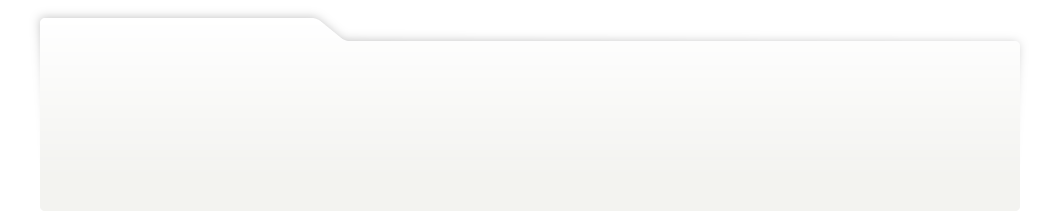
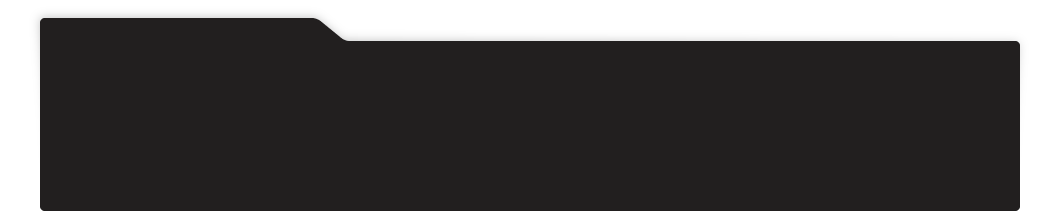
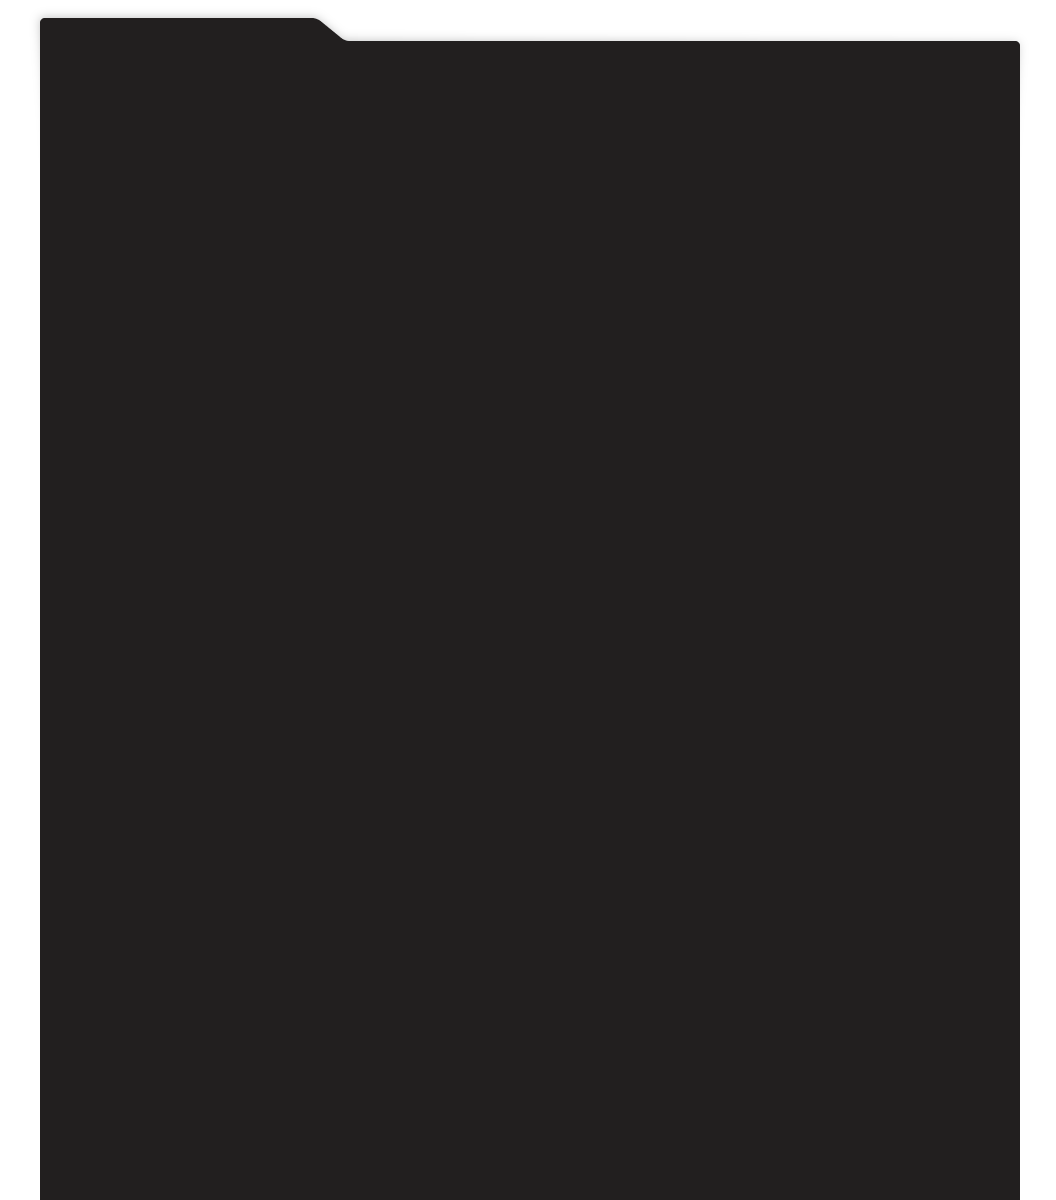
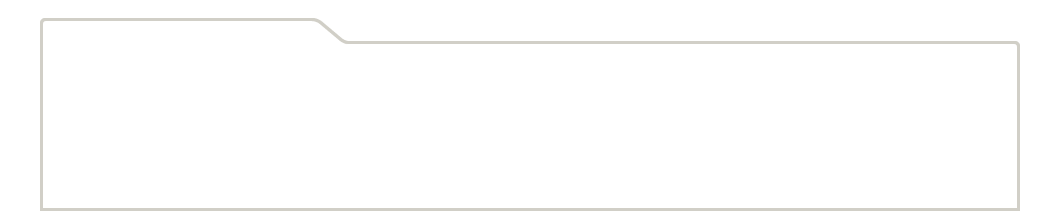
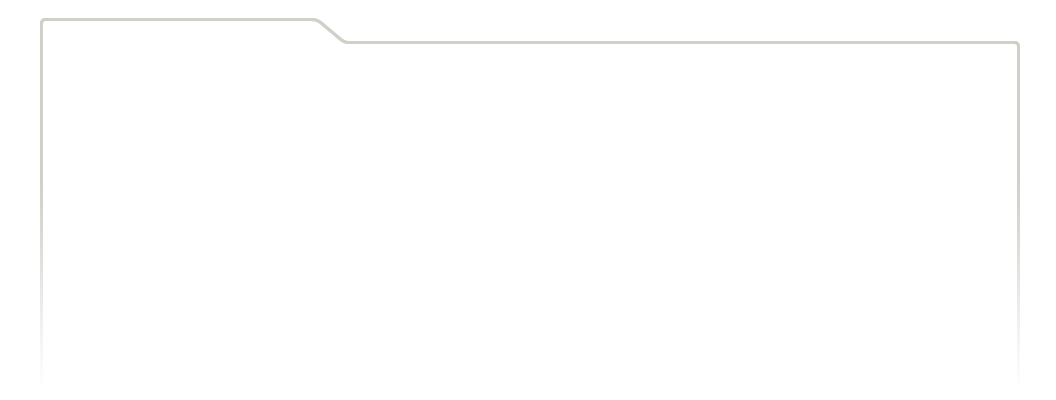
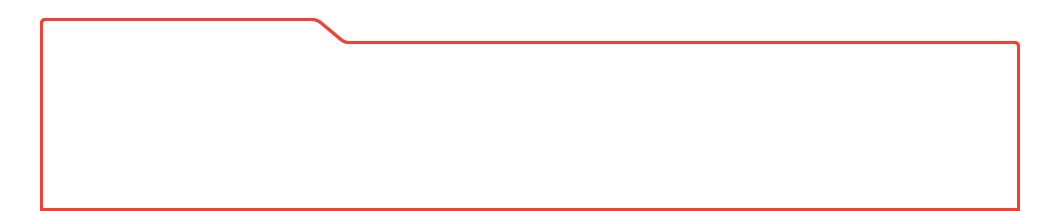
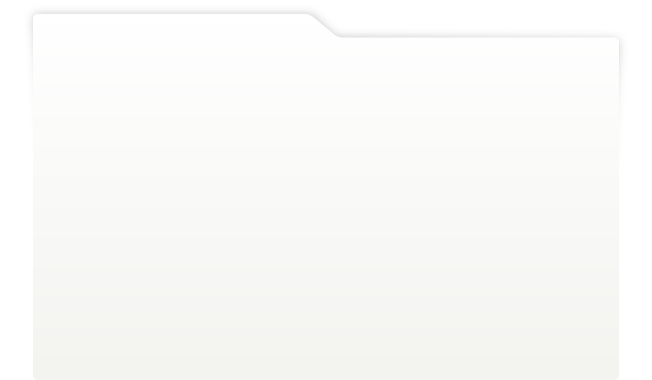
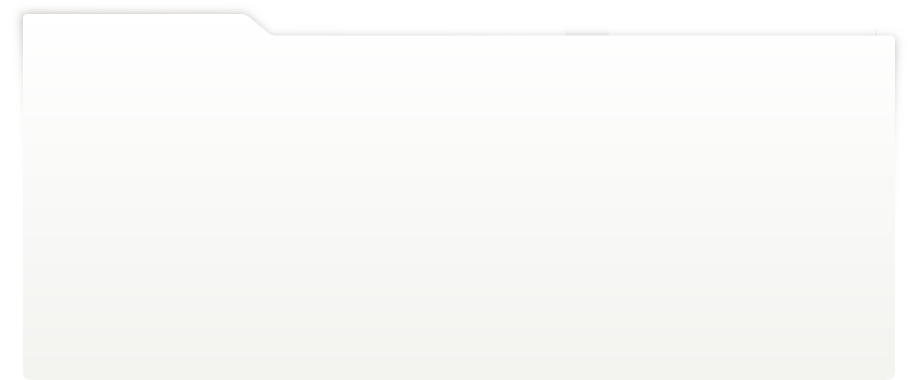
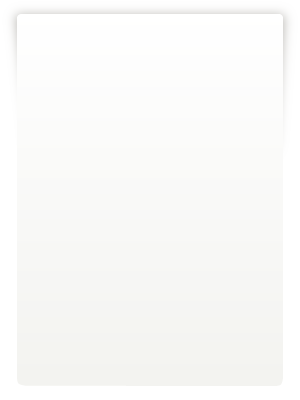
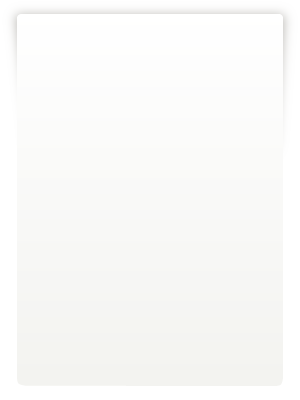
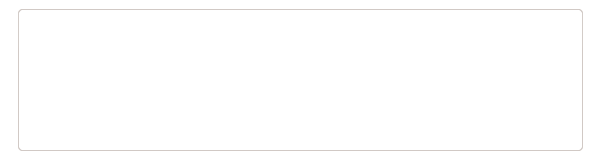
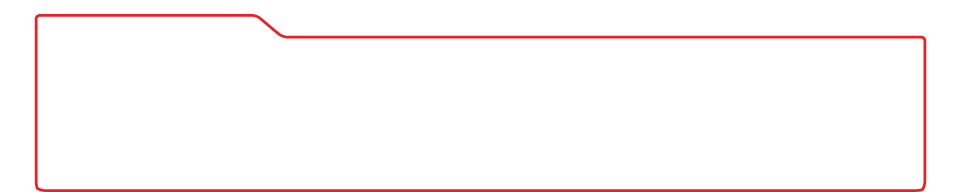
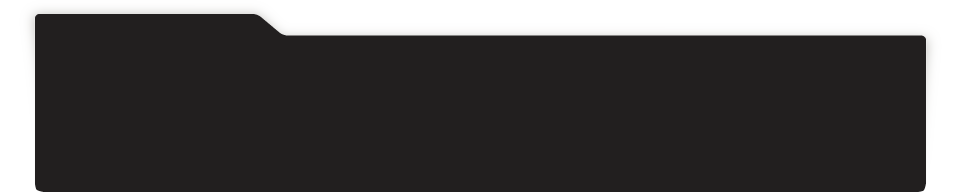
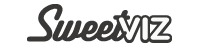
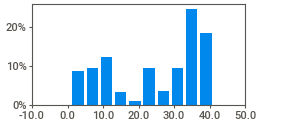
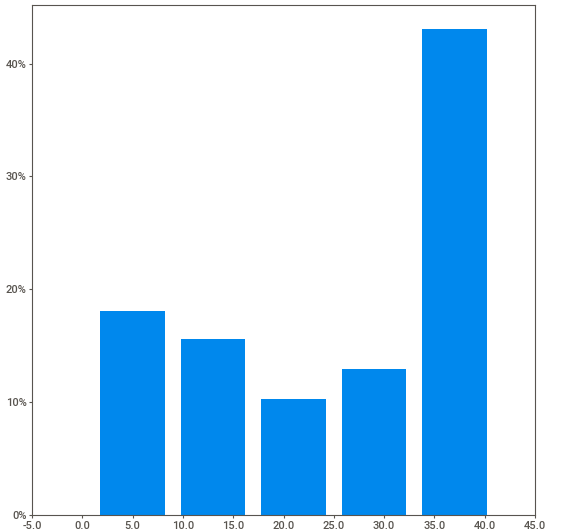
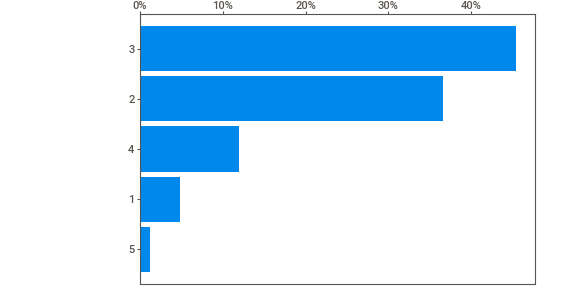
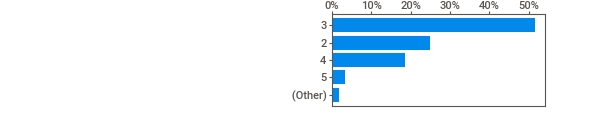
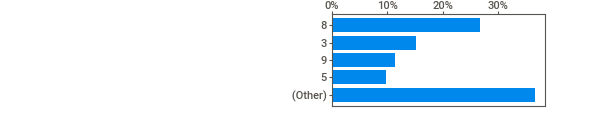
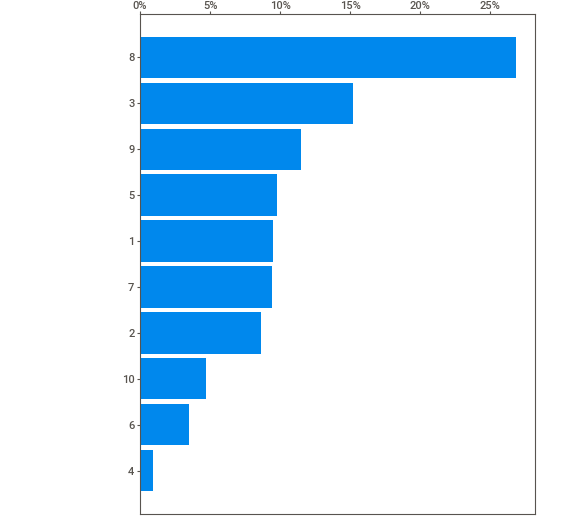
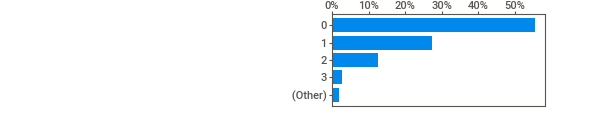
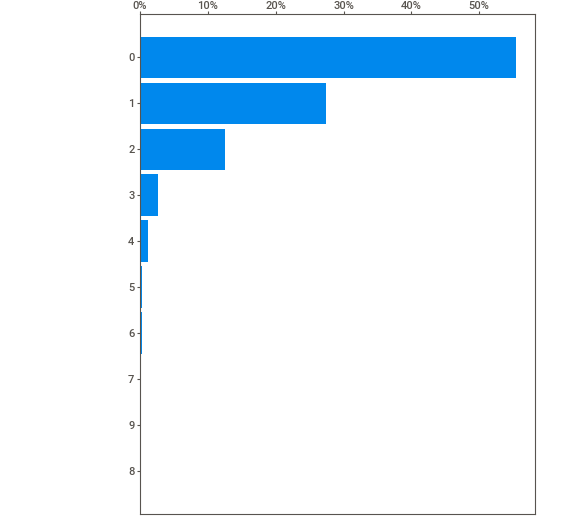
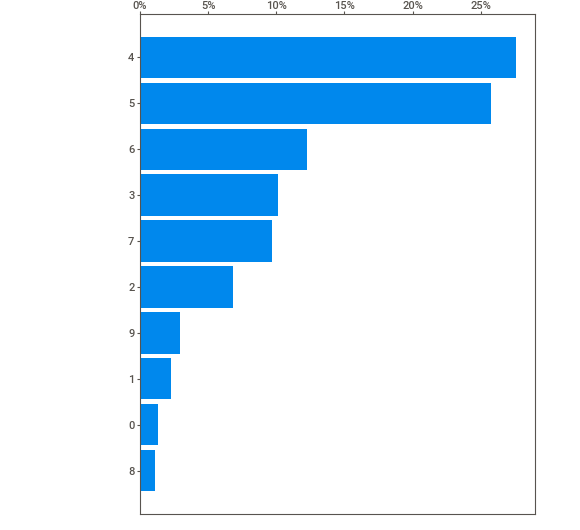
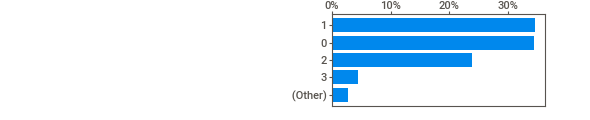
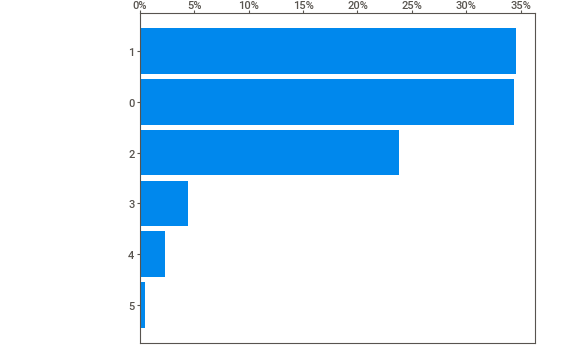
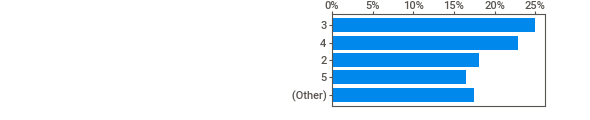
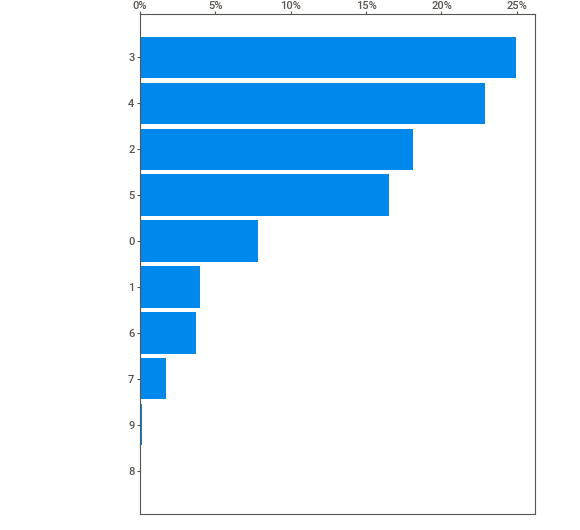
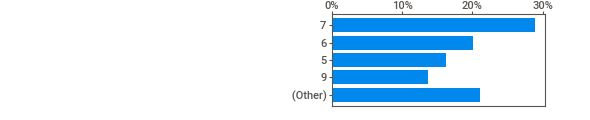
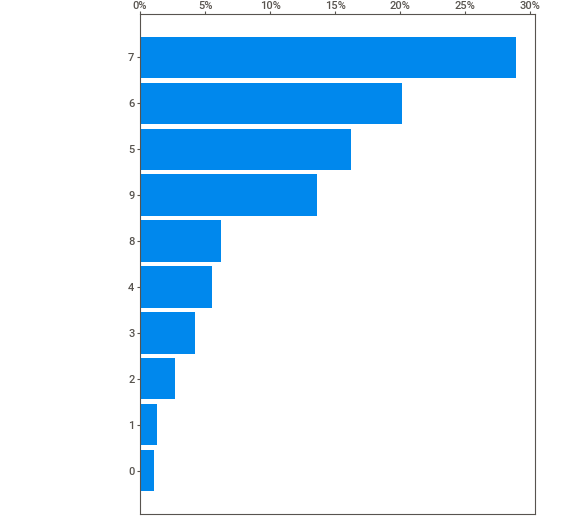
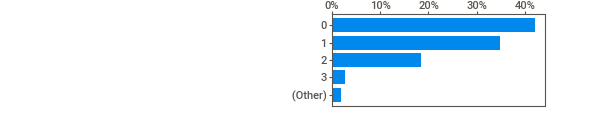
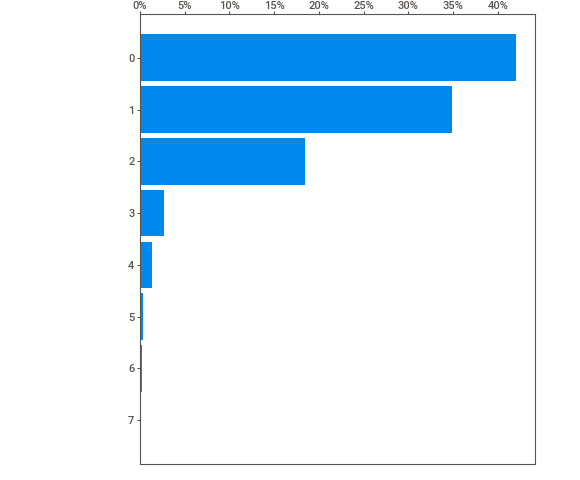
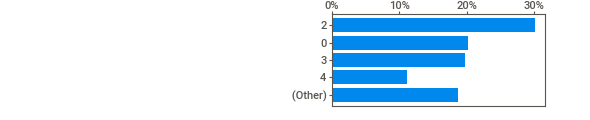
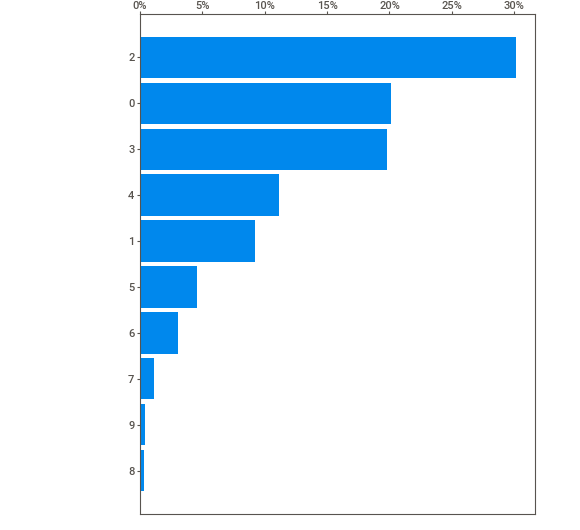
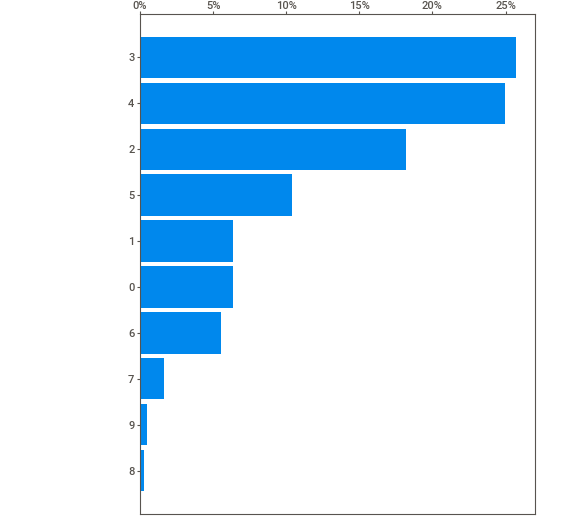
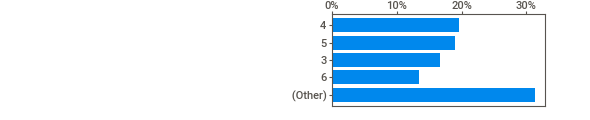
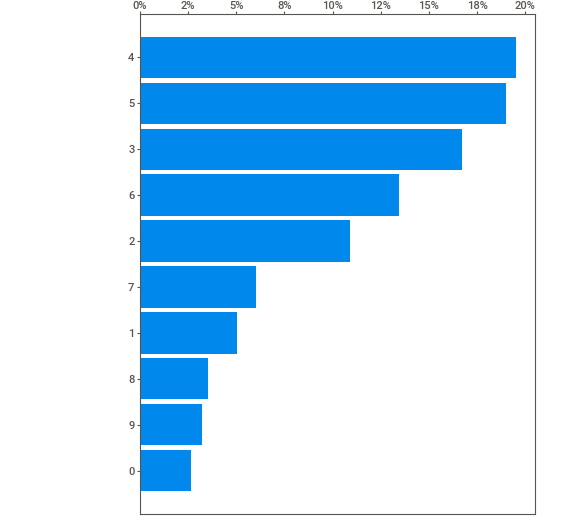
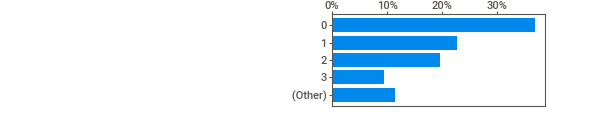
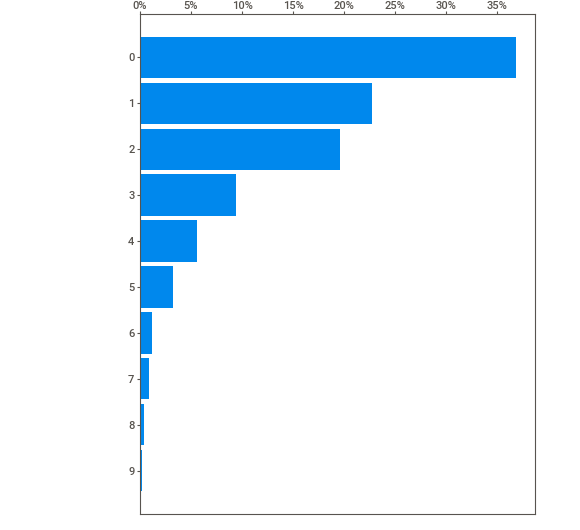
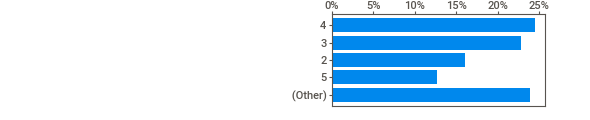
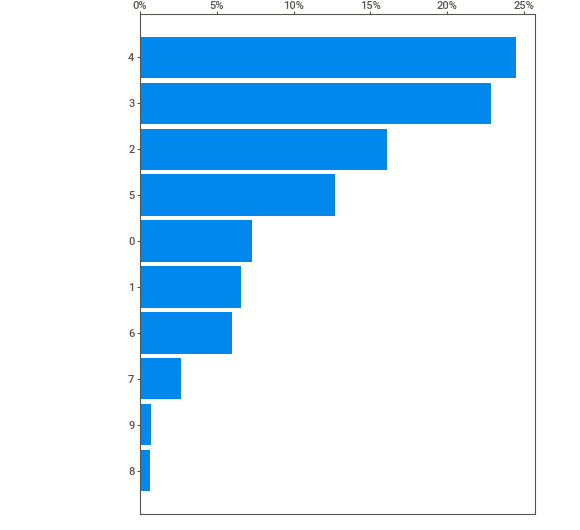
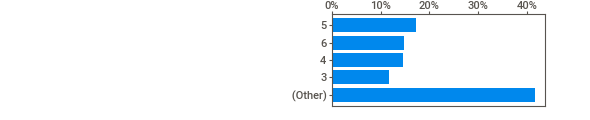
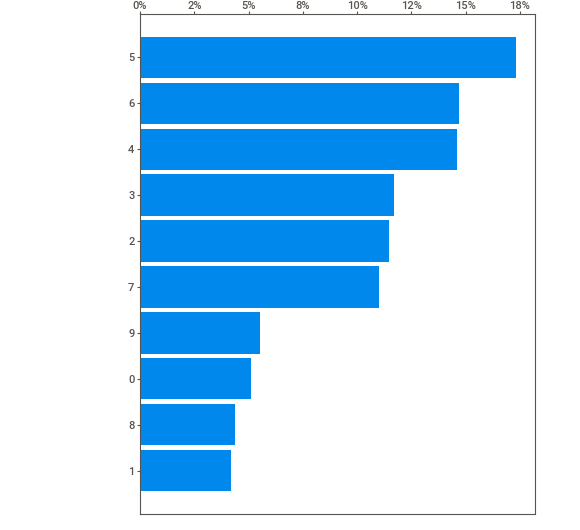
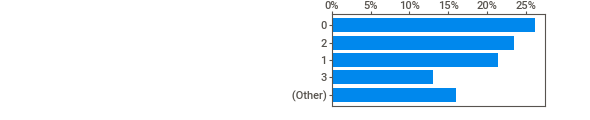
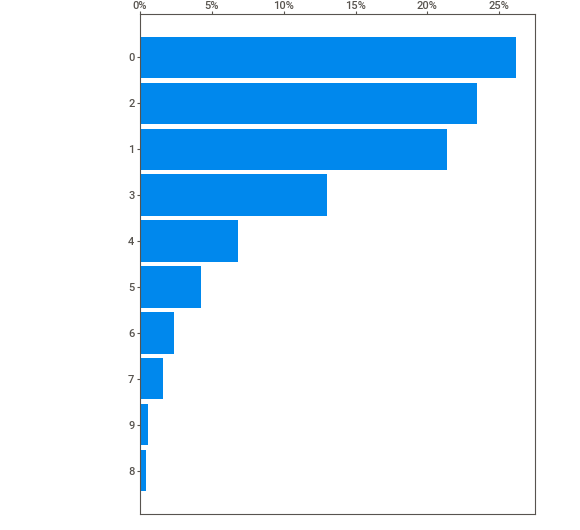
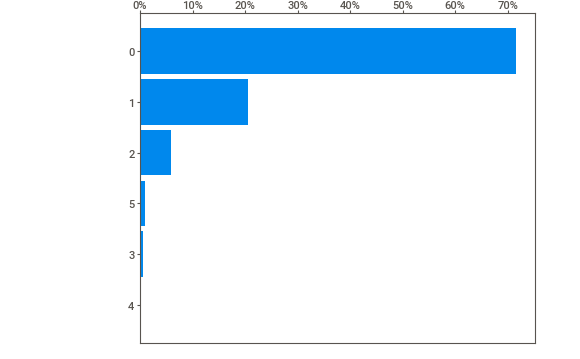
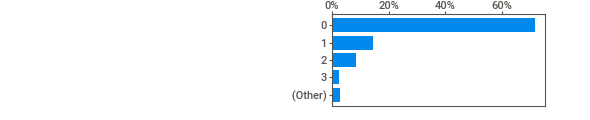
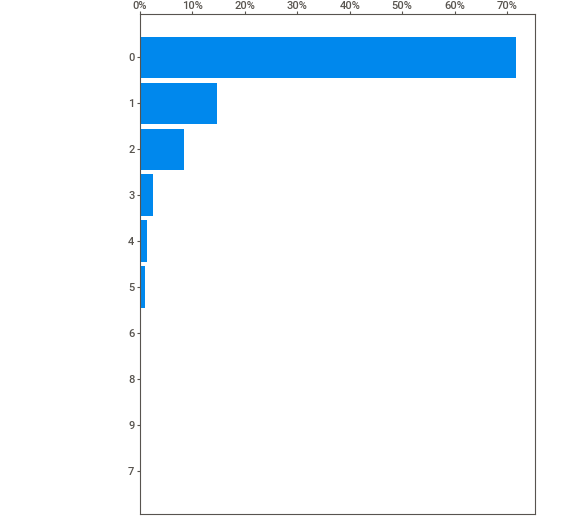
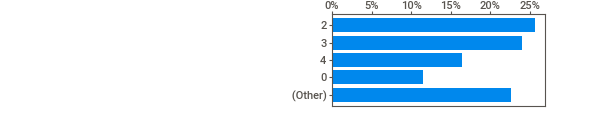
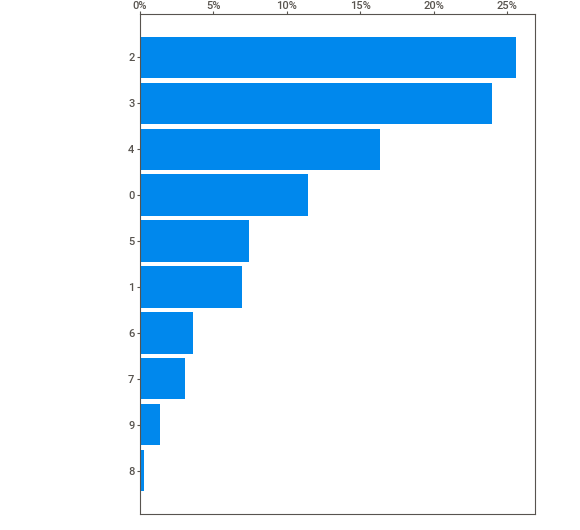
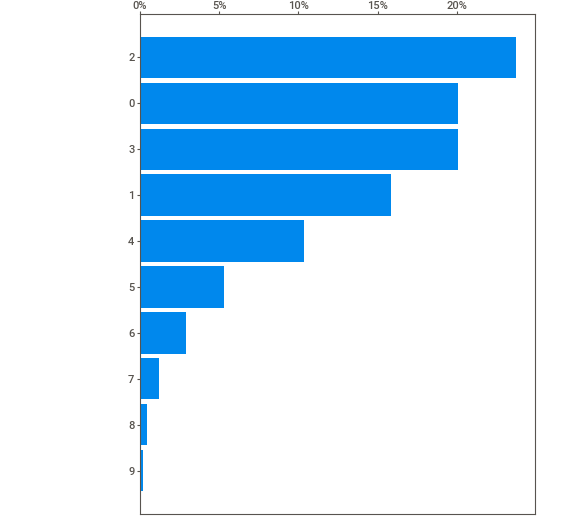
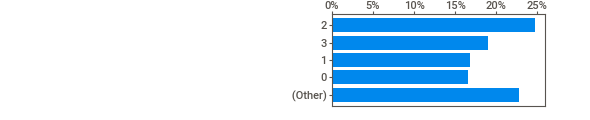
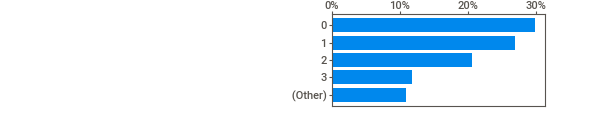
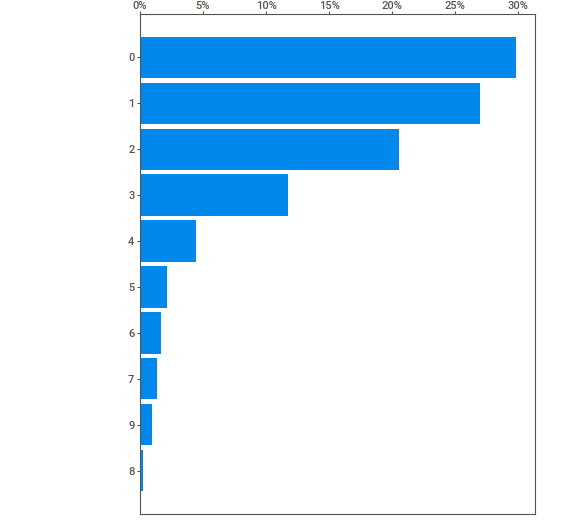
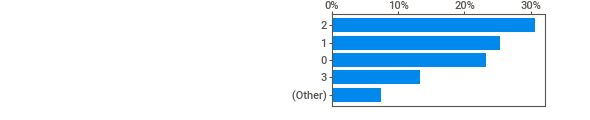
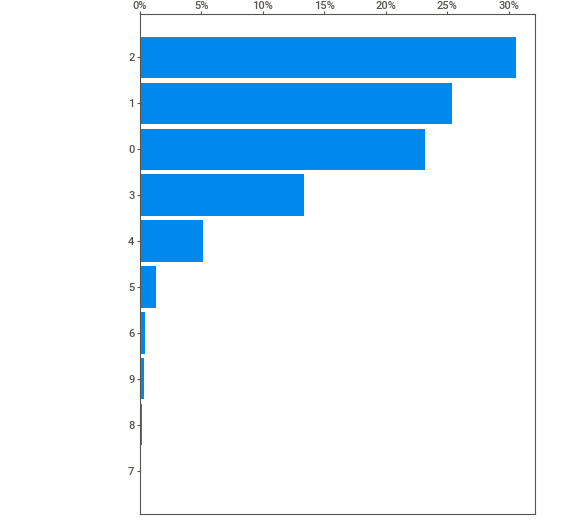
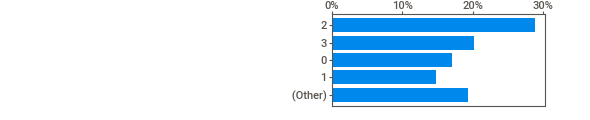
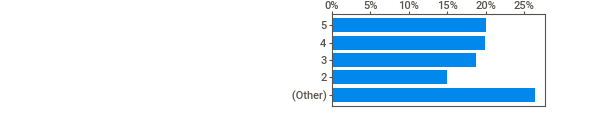
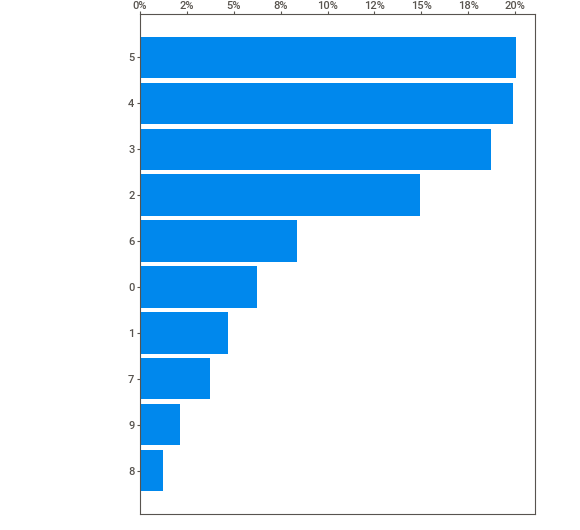
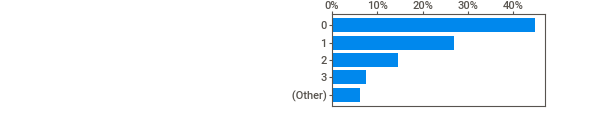
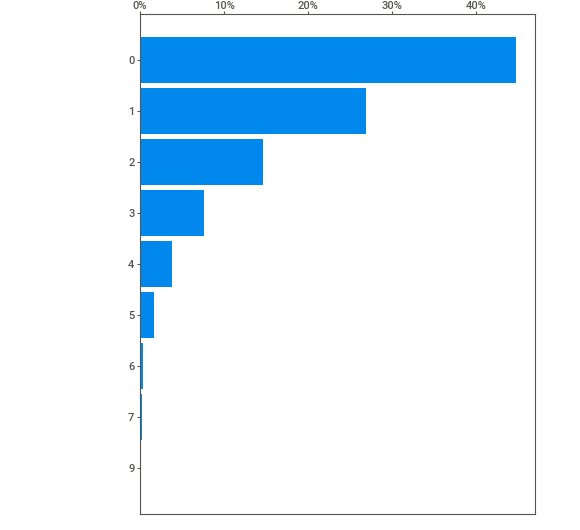
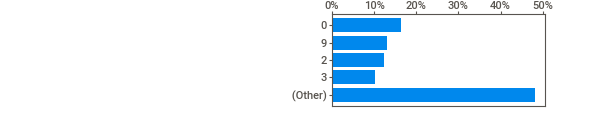
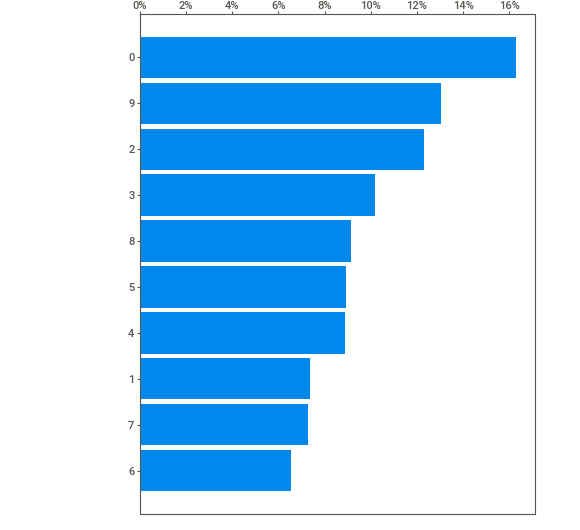
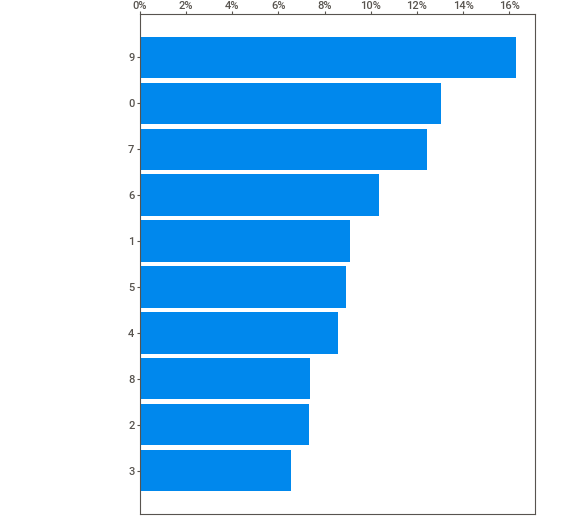
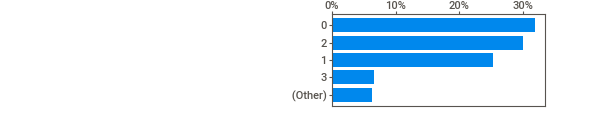
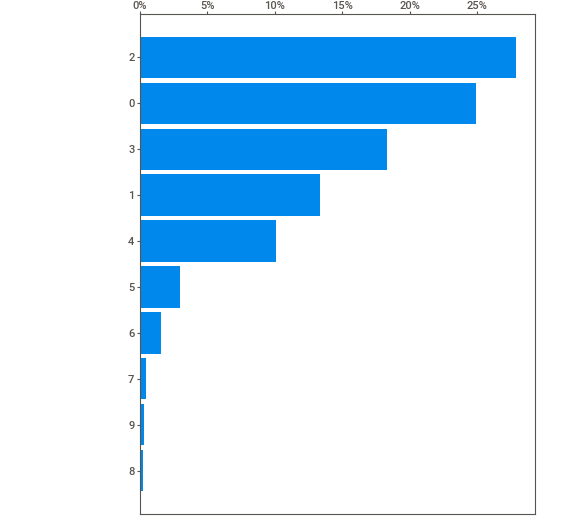
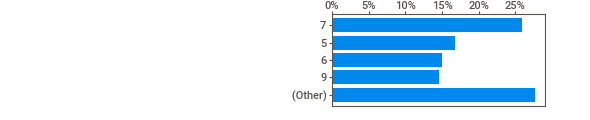
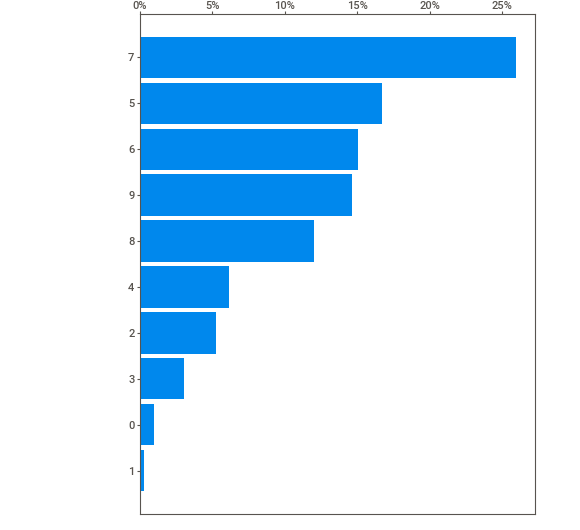
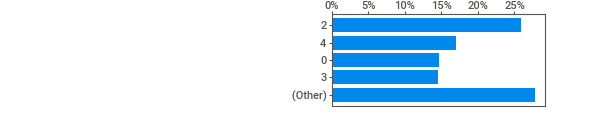
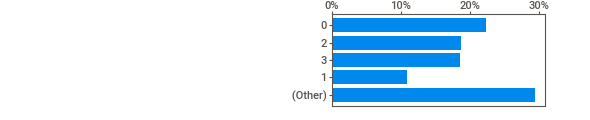
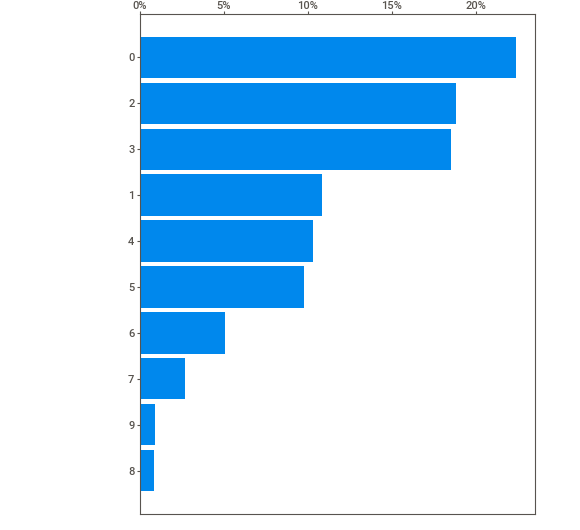
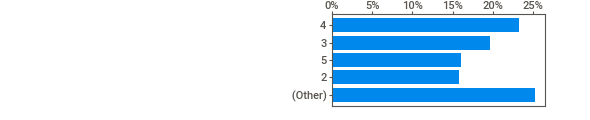
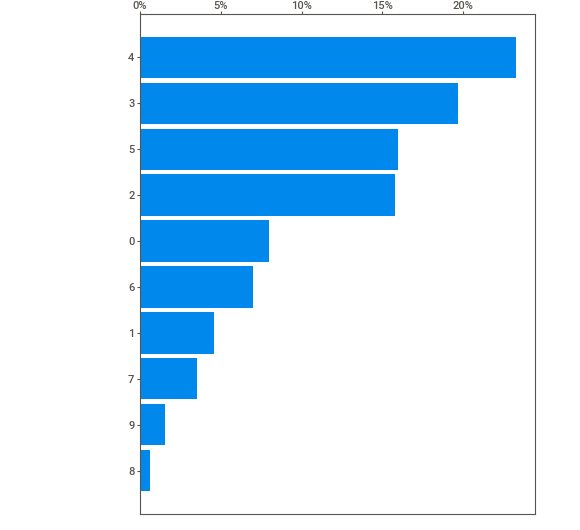
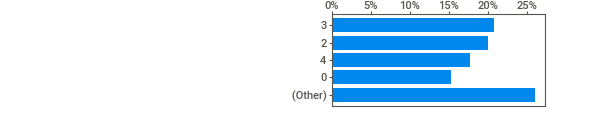
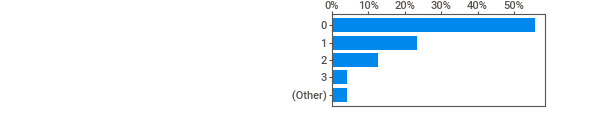
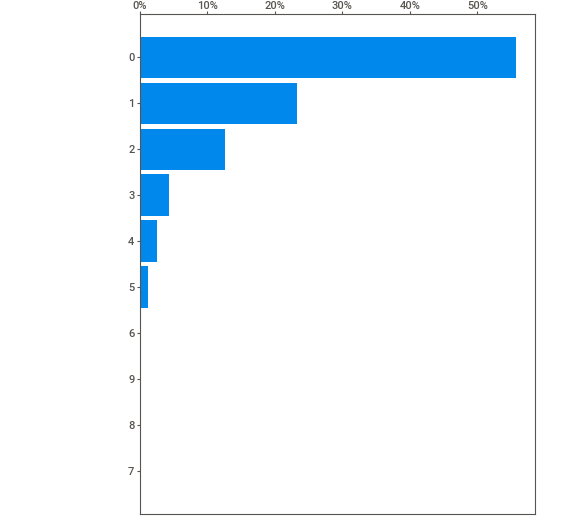
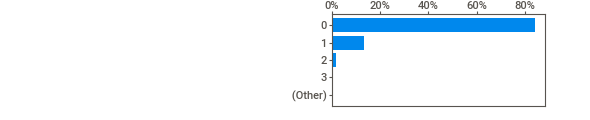
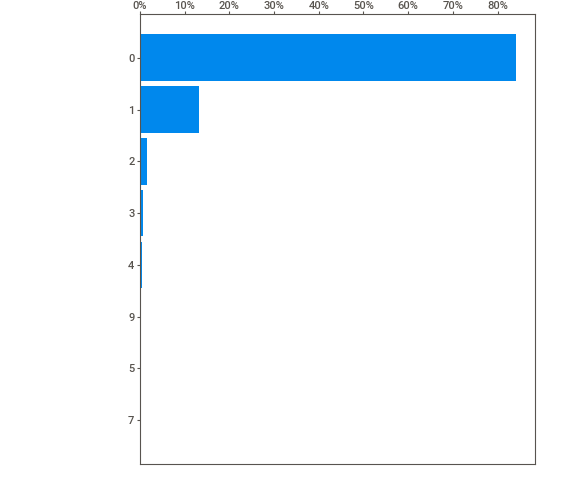
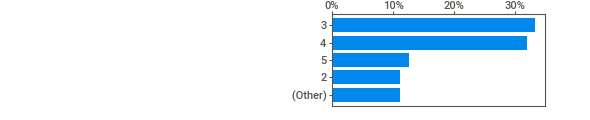
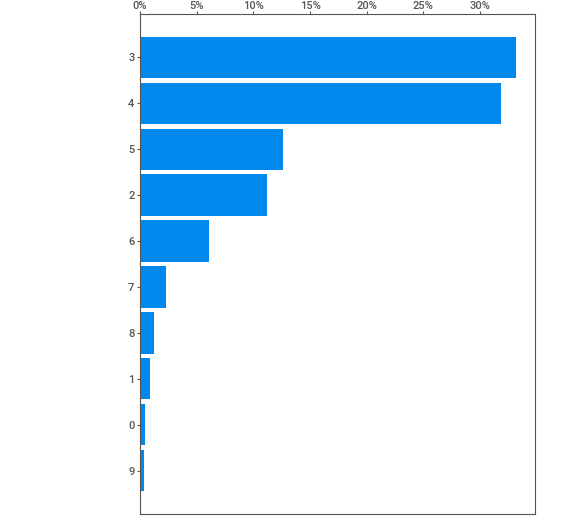
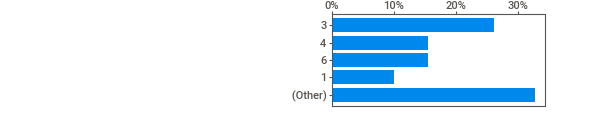
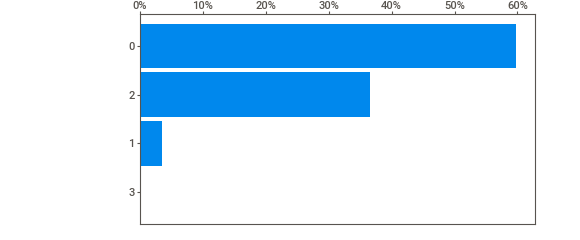
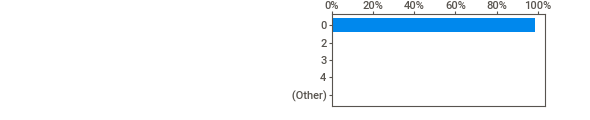
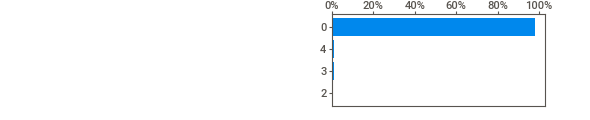
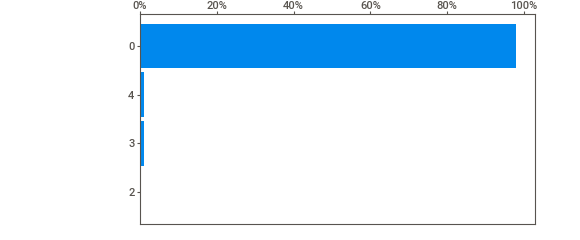
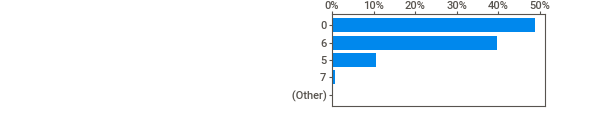
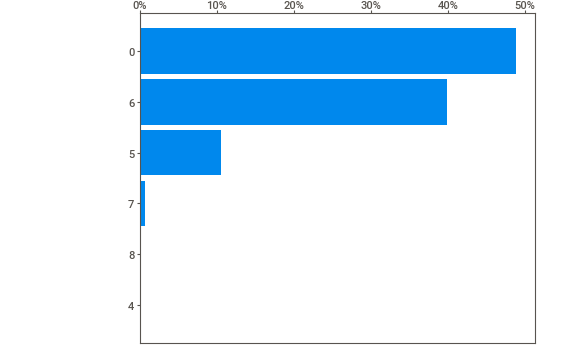
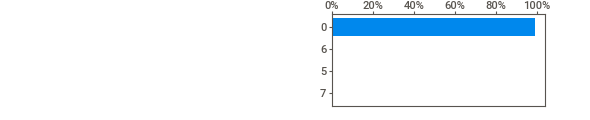
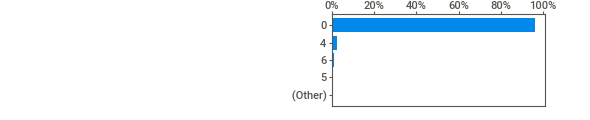
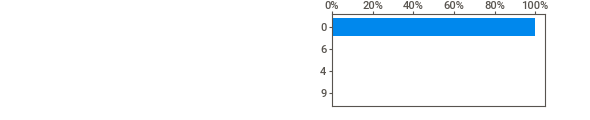
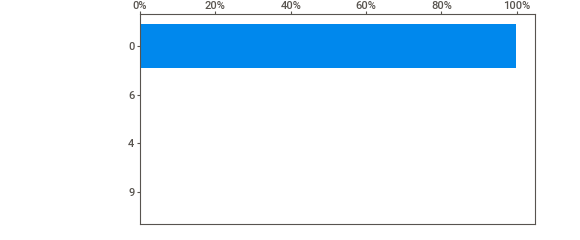
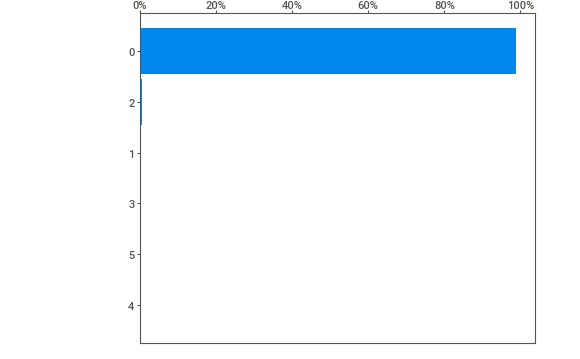
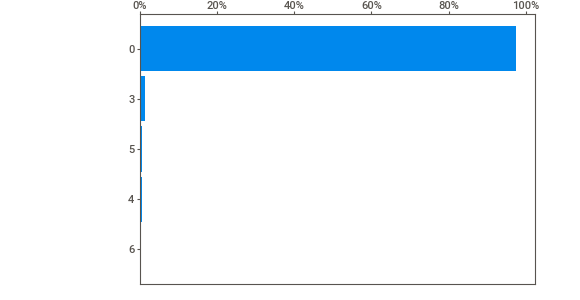
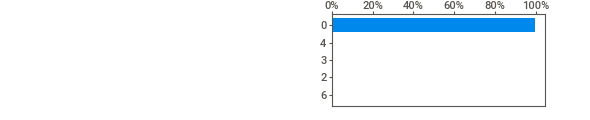
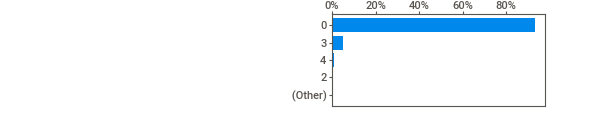
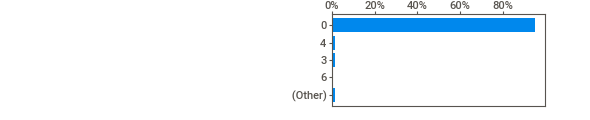
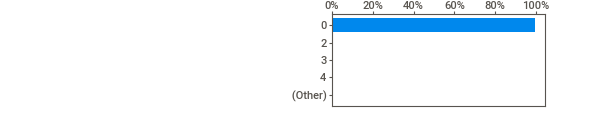
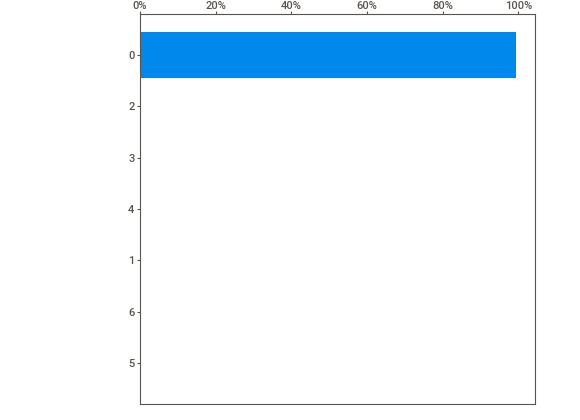
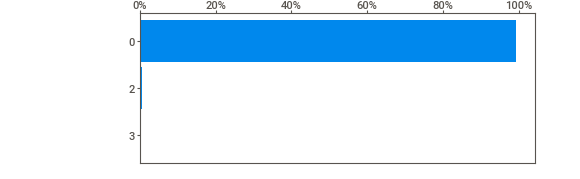
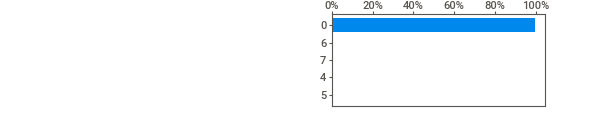
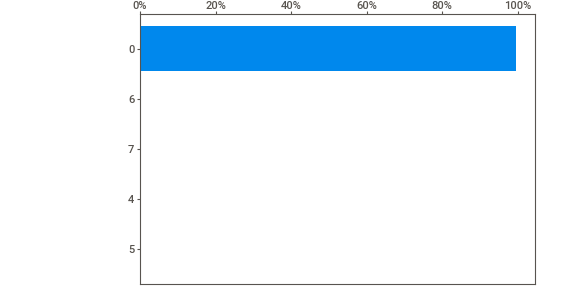
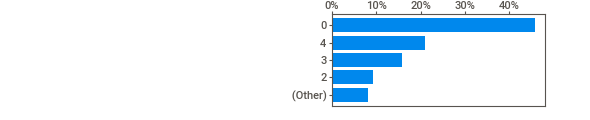
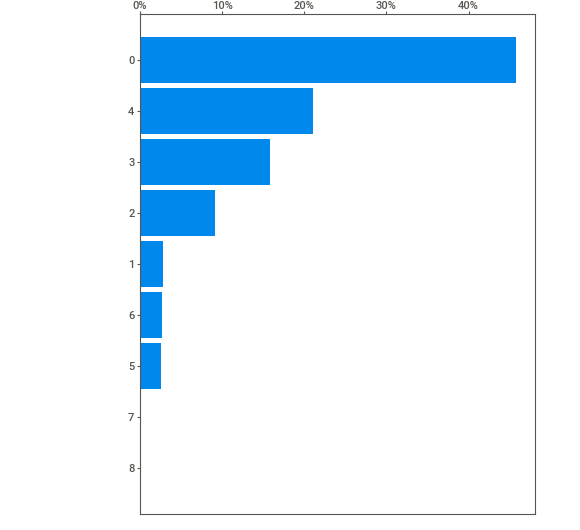
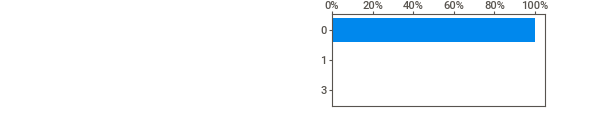
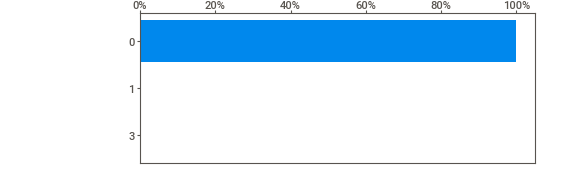
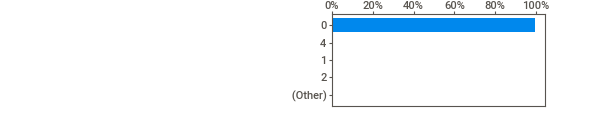
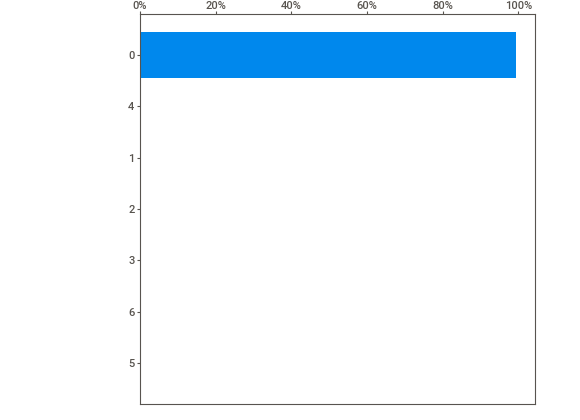
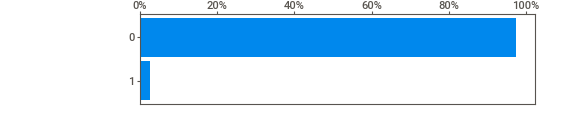
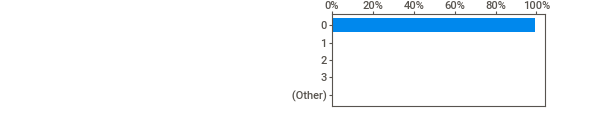
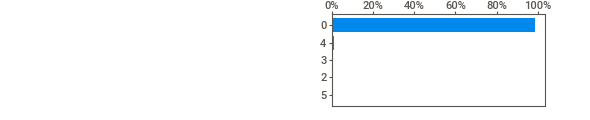
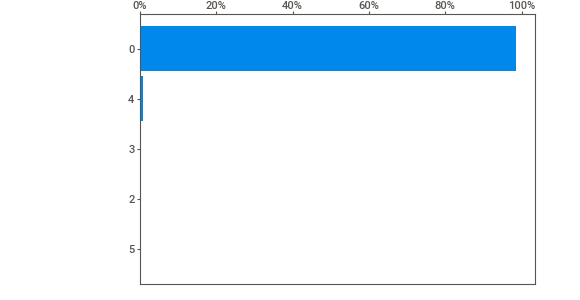
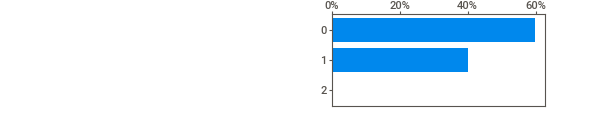
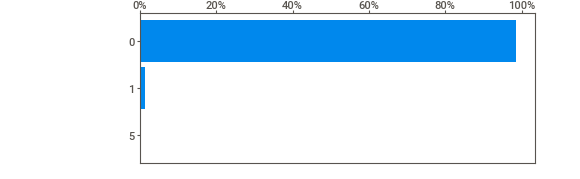
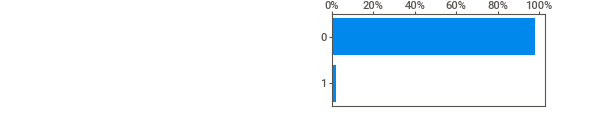
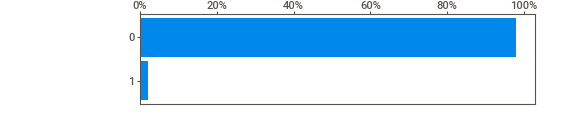
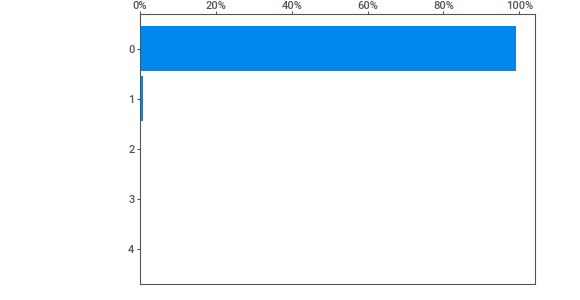
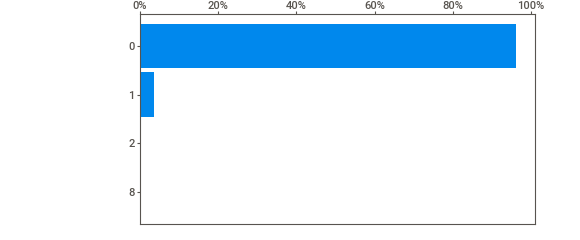
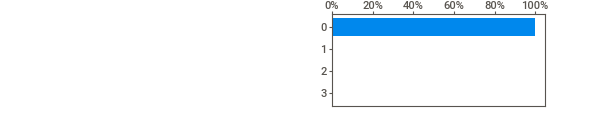
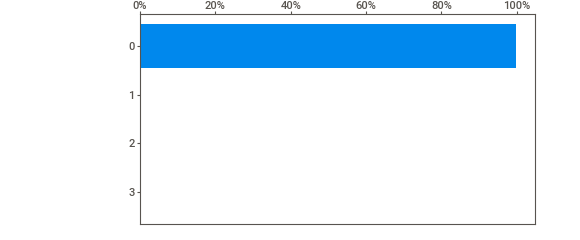
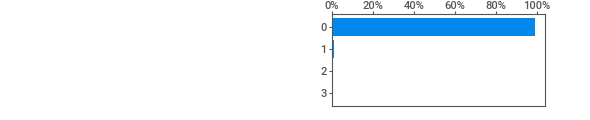
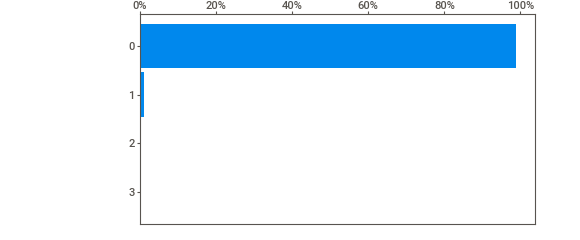
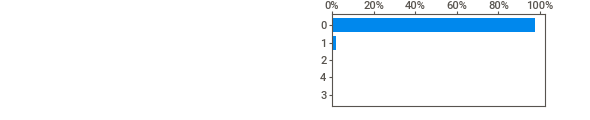
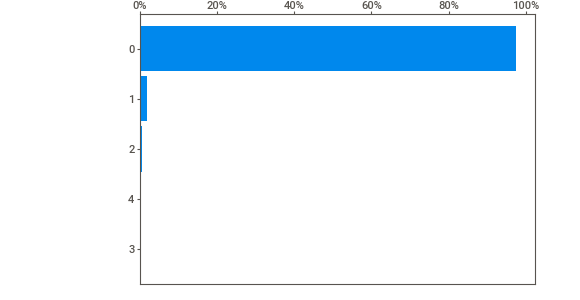
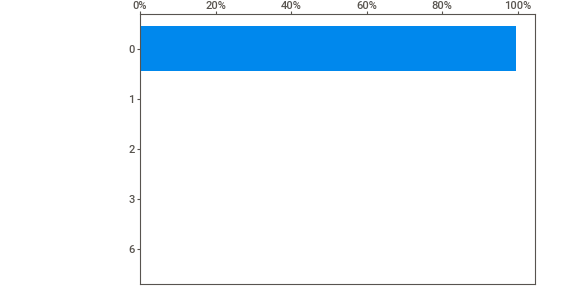
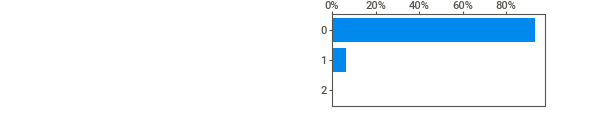
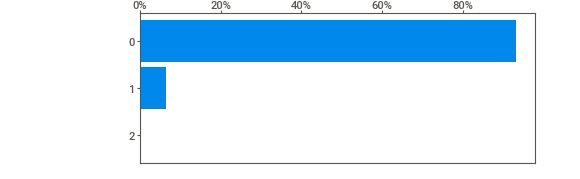
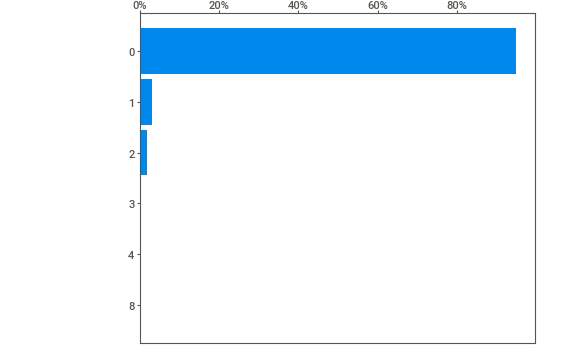
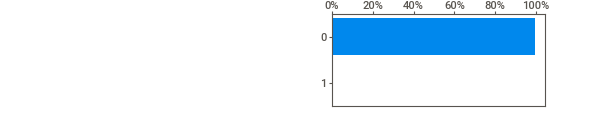
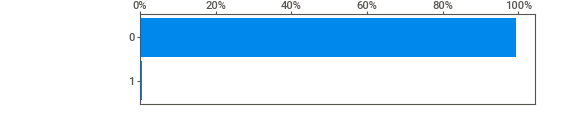
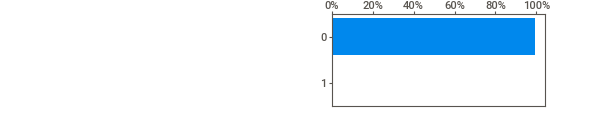
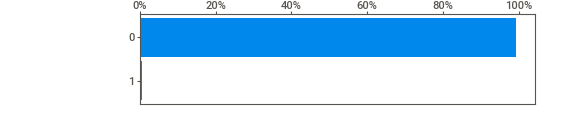
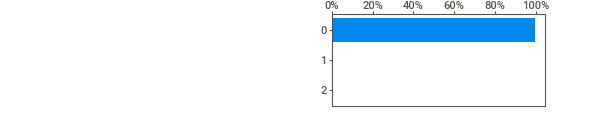
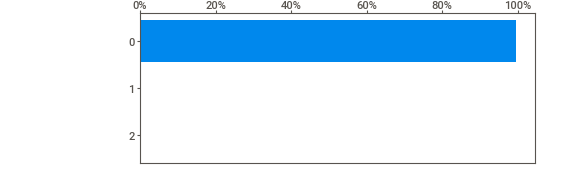
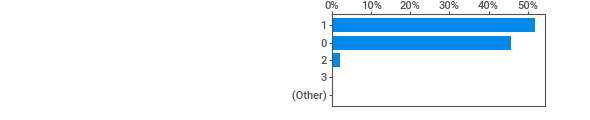
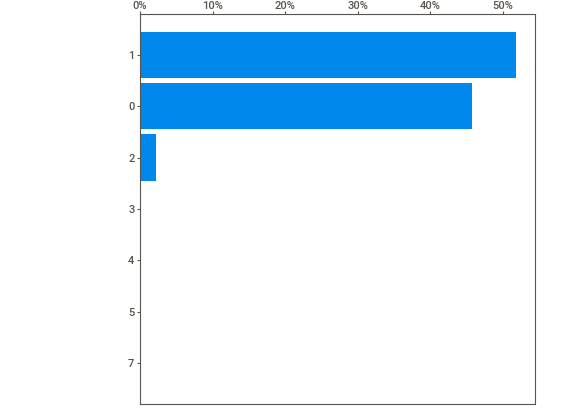
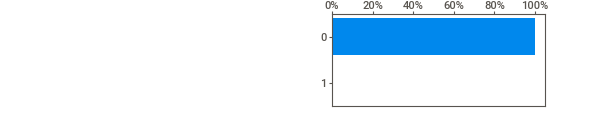
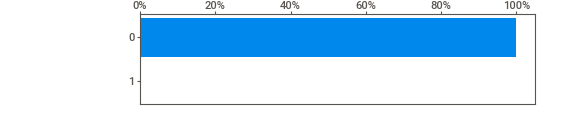
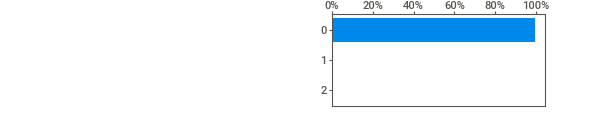
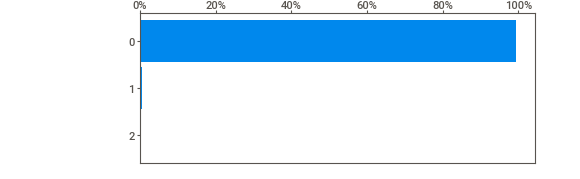
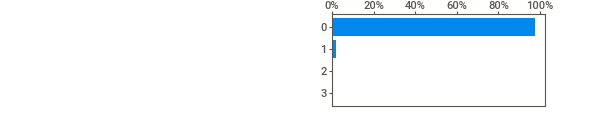
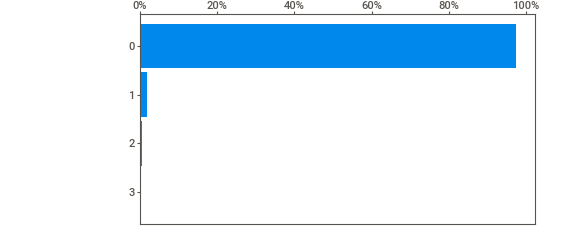
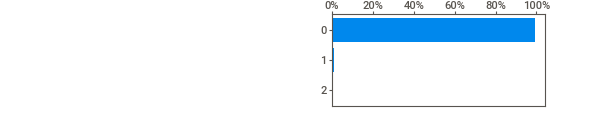
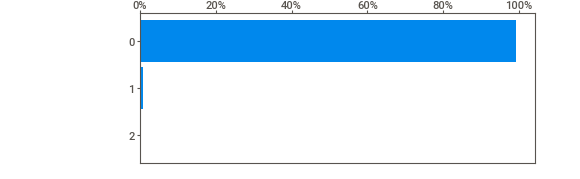
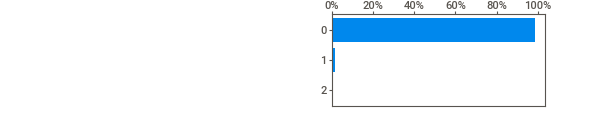
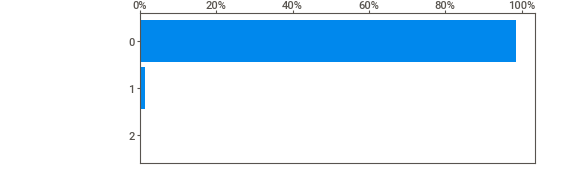
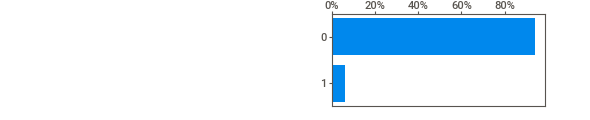
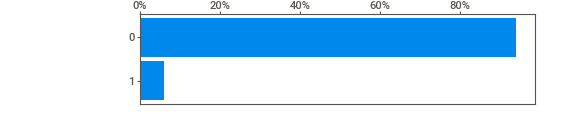
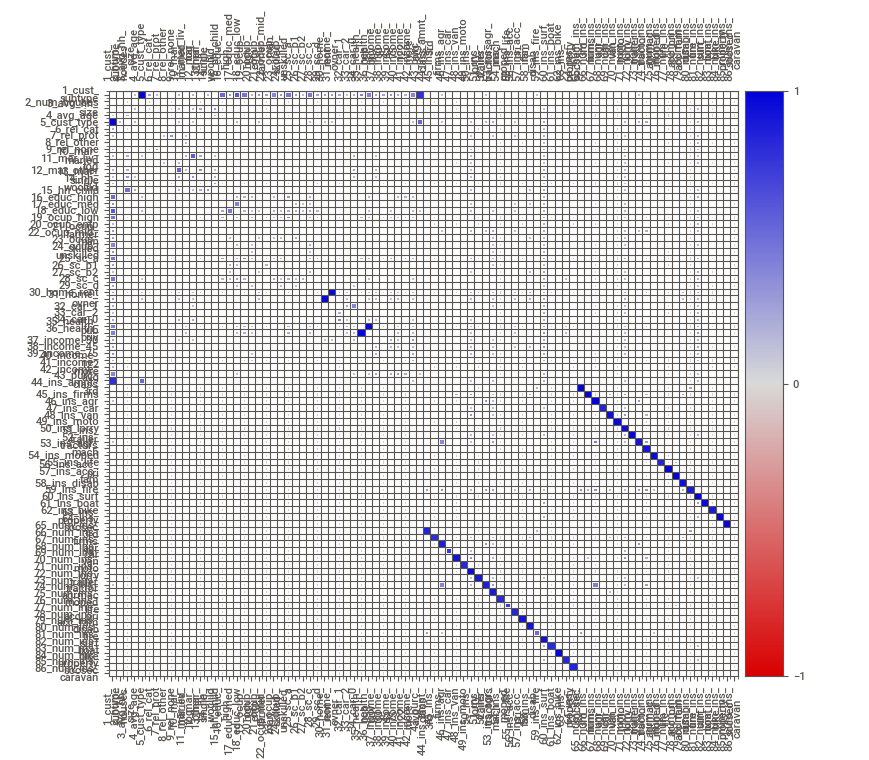
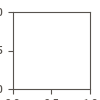

In [18]:
IPython.display.HTML('primer_analisis.html')# si no funciona display por favor mirar a HTMLs auxiliares.

Abajo comparamos los dos frames si estan distribuido mas o menos igual.

In [19]:
compare_report = sv.compare([data_train, "train"],[data_test, "test"])
compare_report.show_html("compare.html")

                                             |                                                                …

Report compare.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



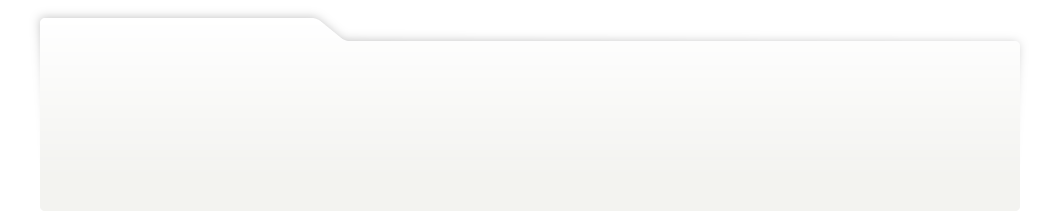
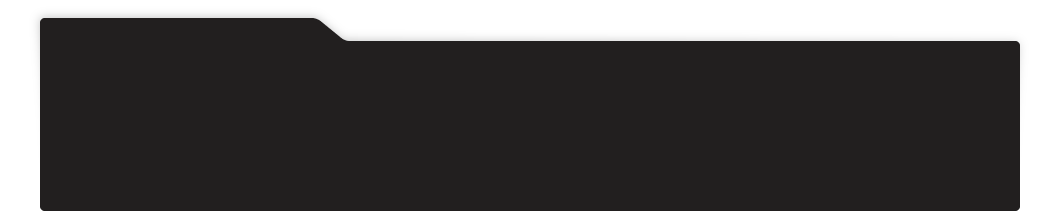
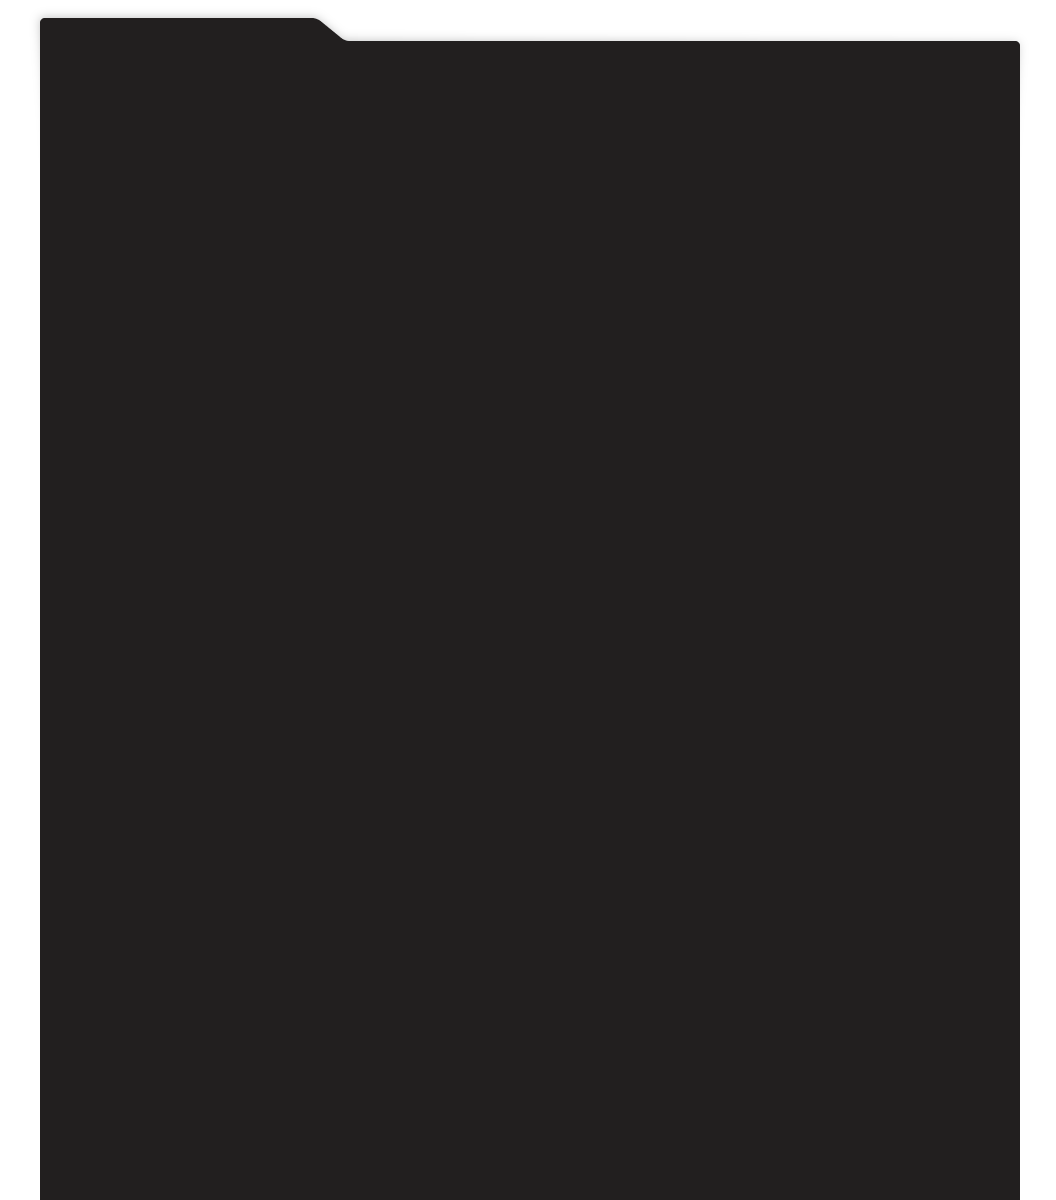
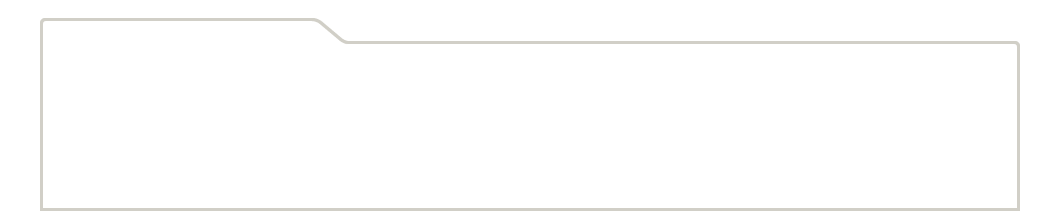
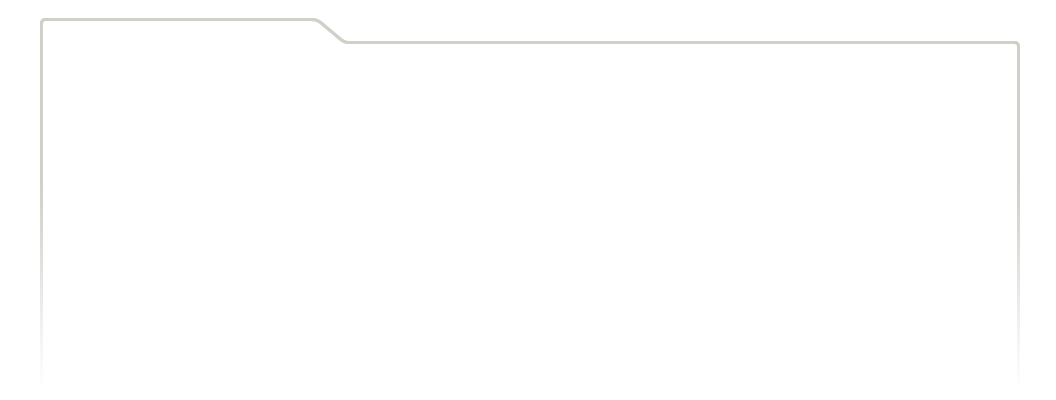
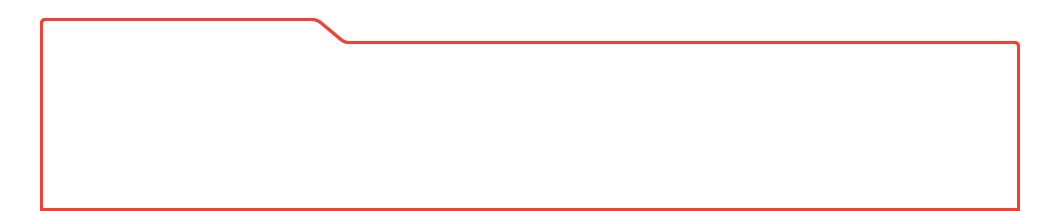
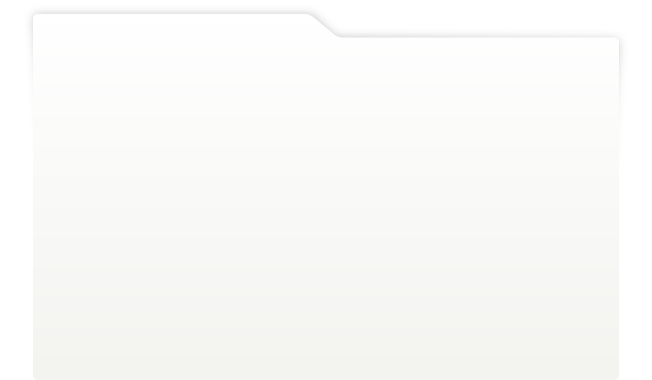
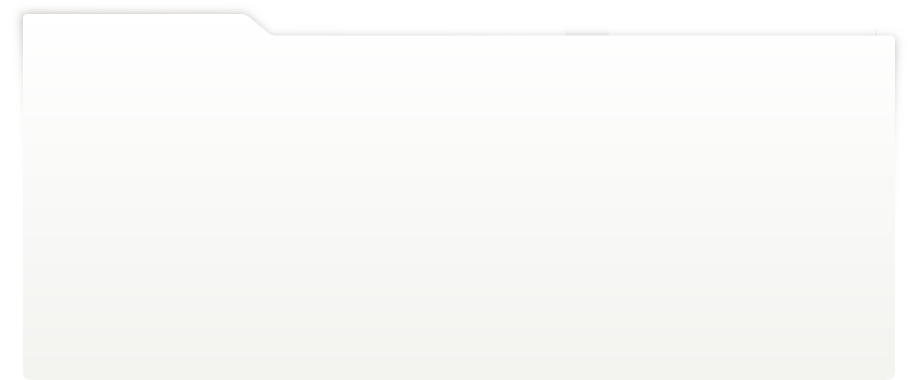
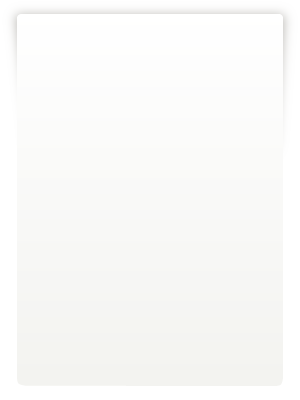
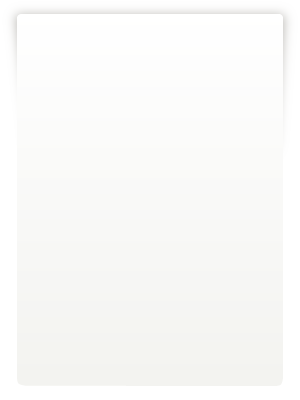
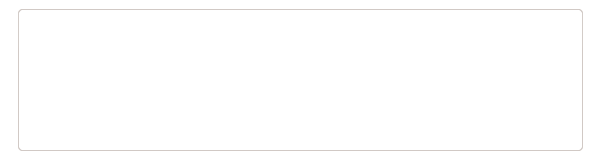
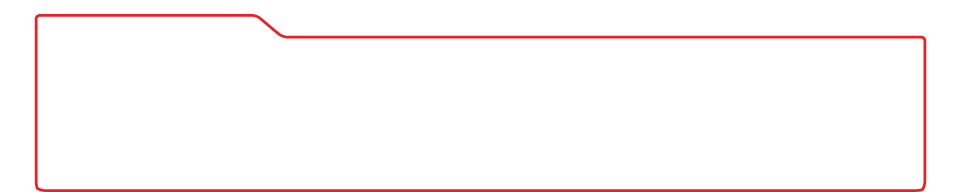
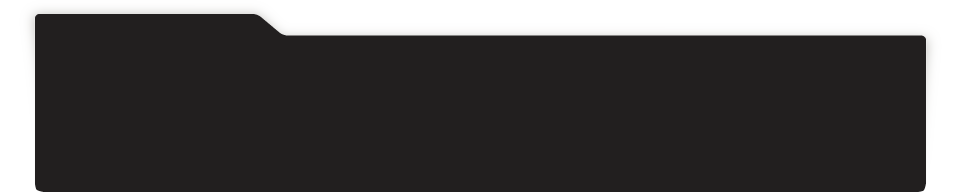
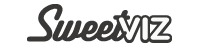
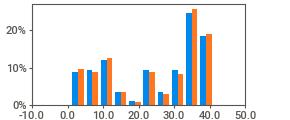
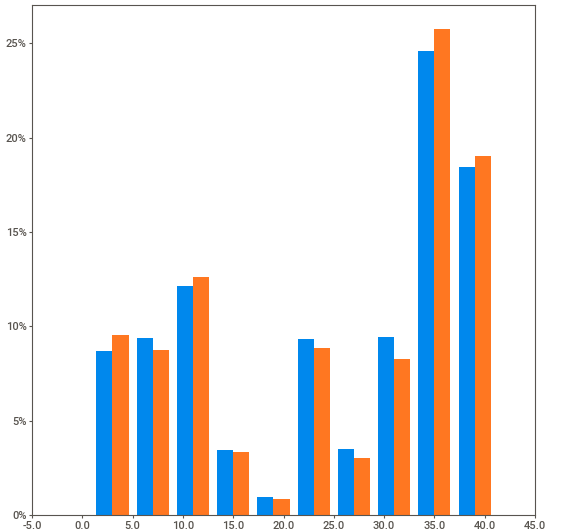
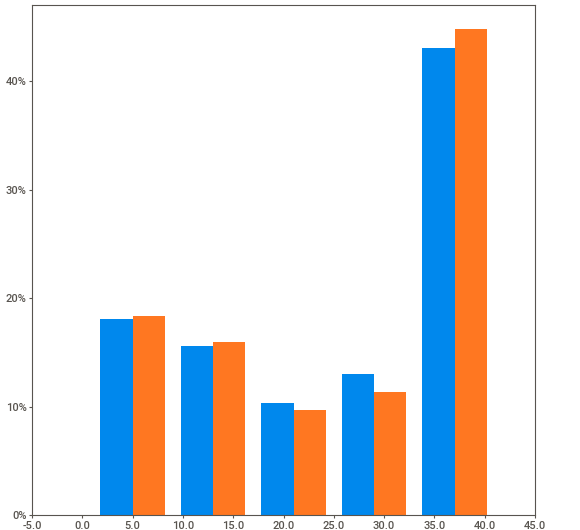
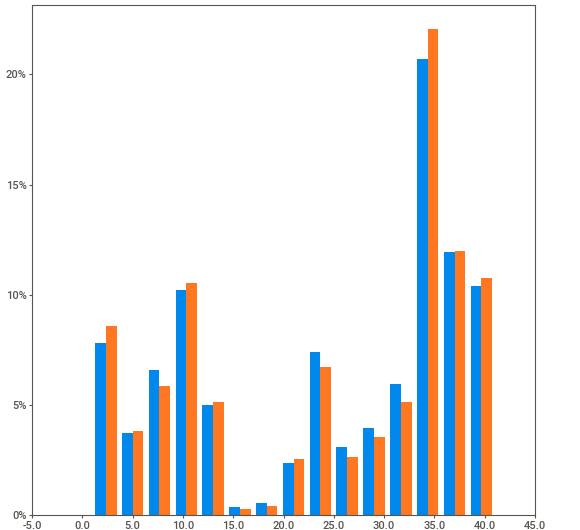
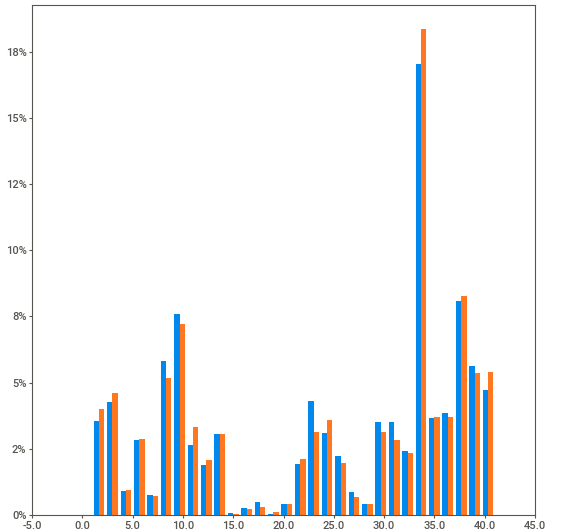
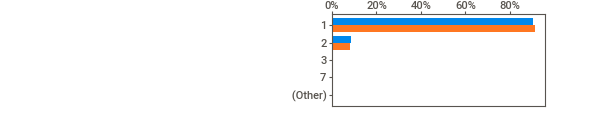
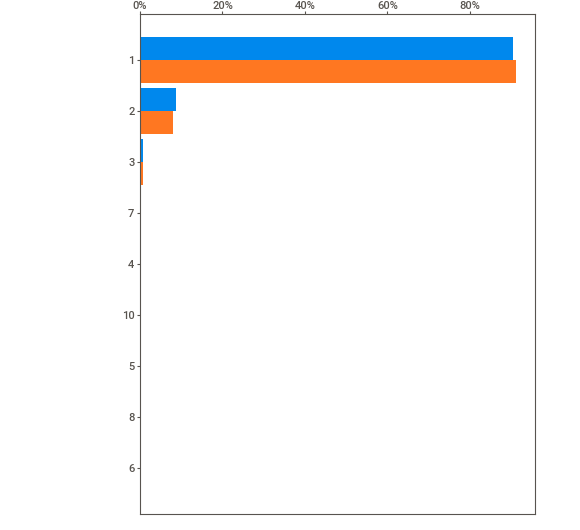
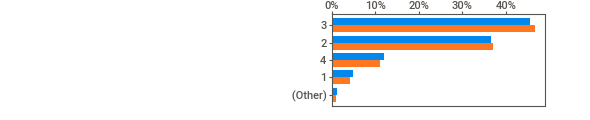
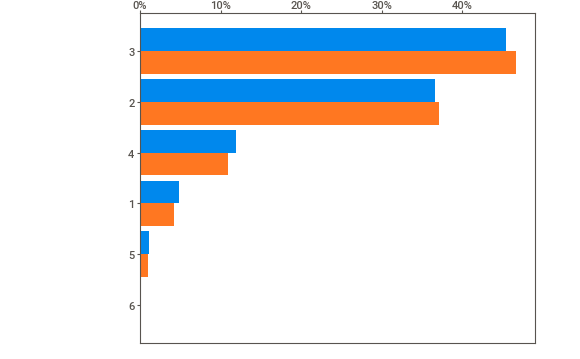
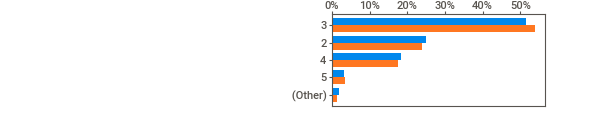
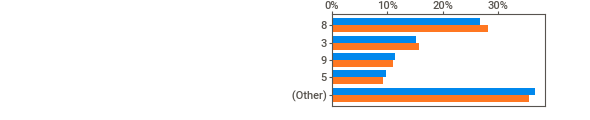
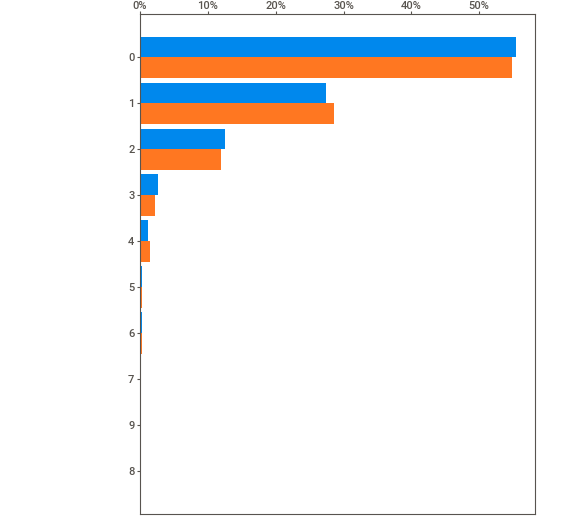
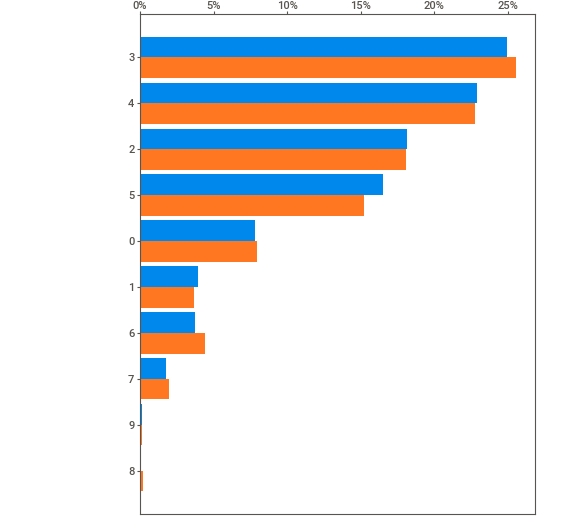
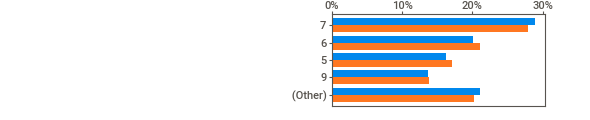
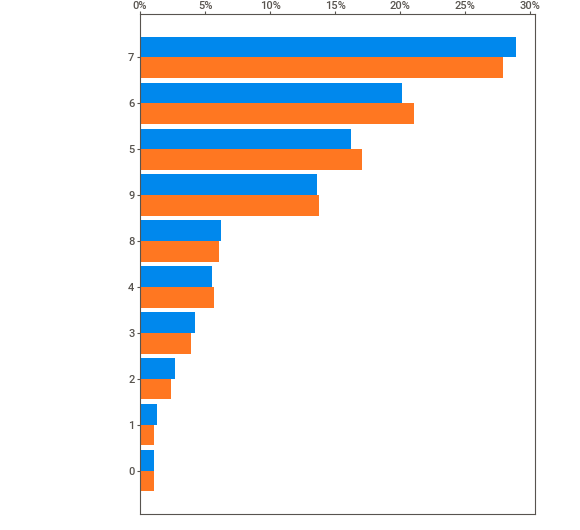
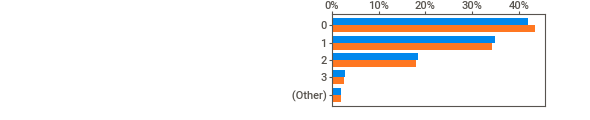
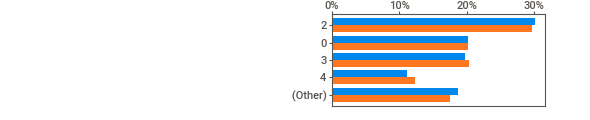
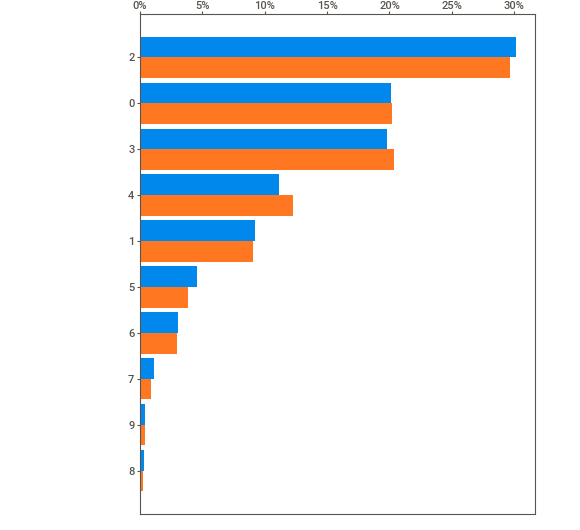
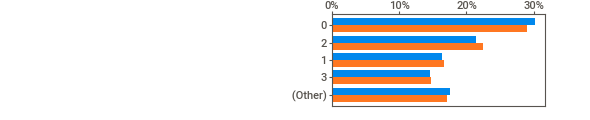
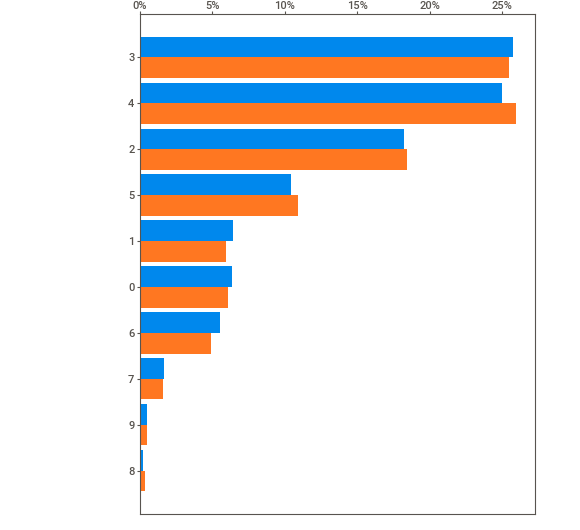
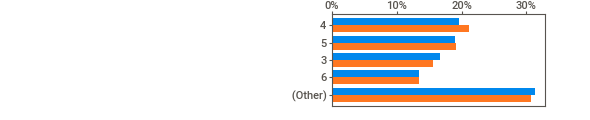
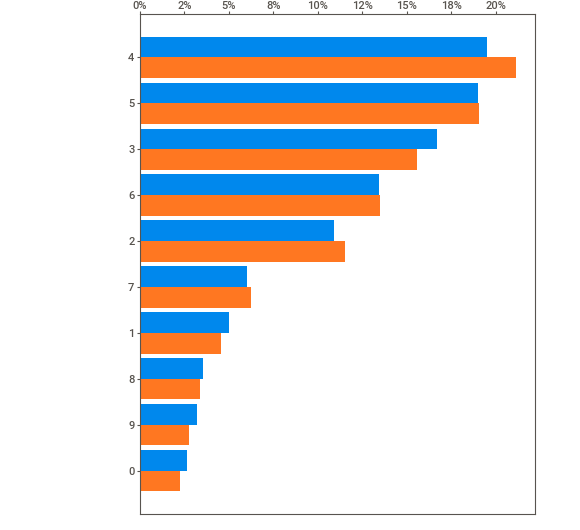
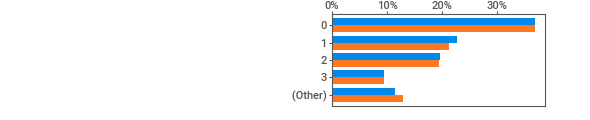
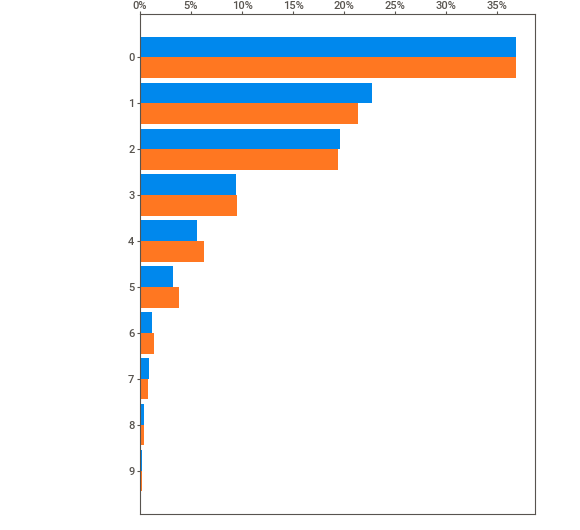
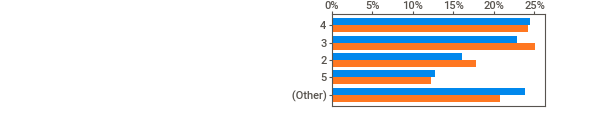
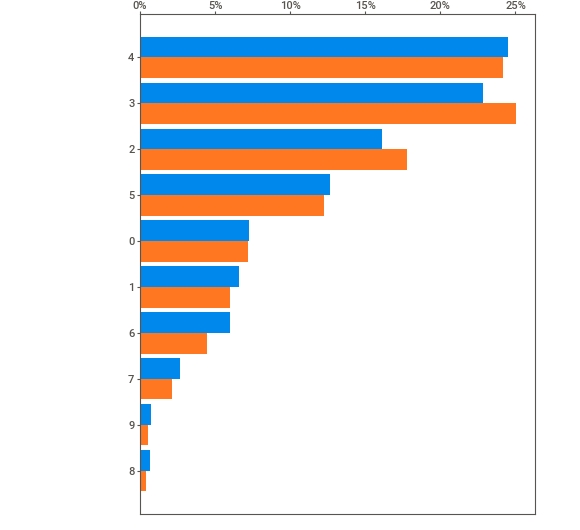
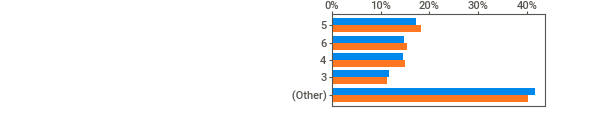
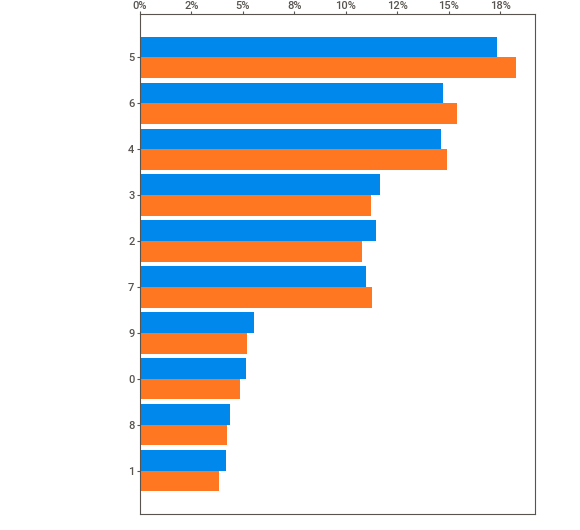
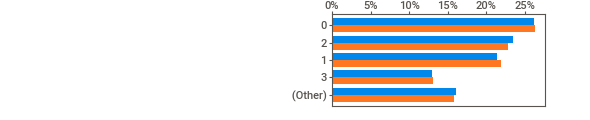
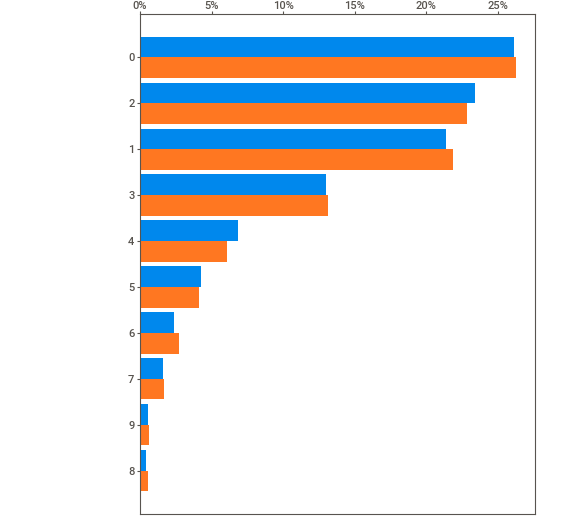
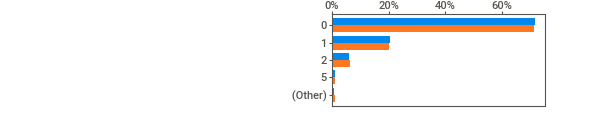
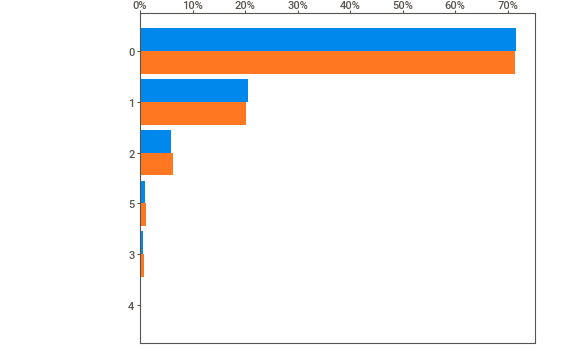
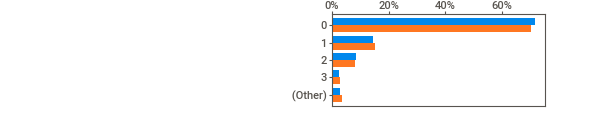
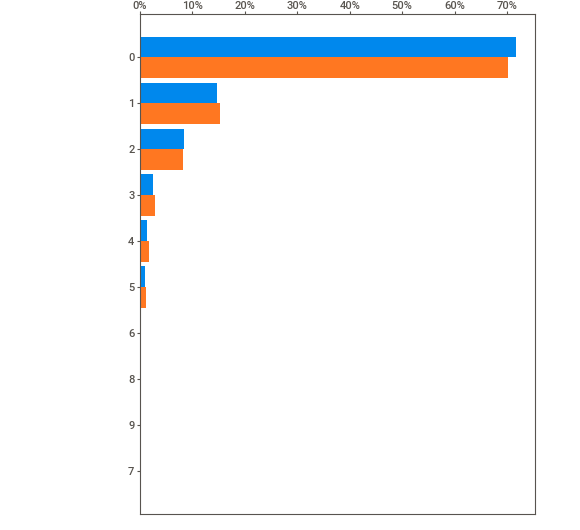
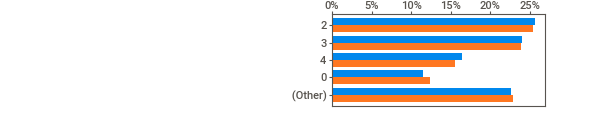
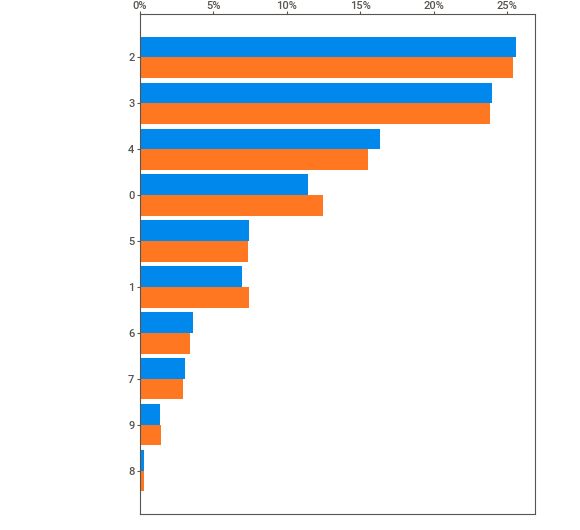
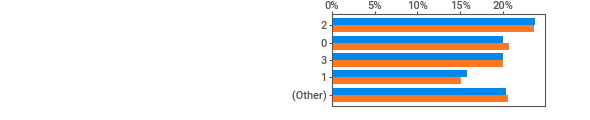
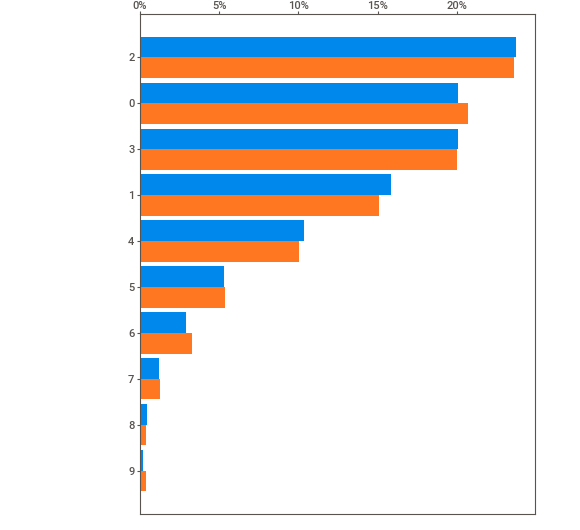
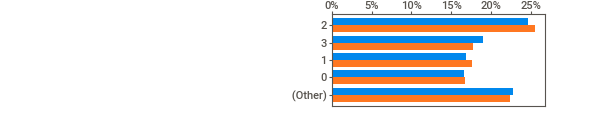
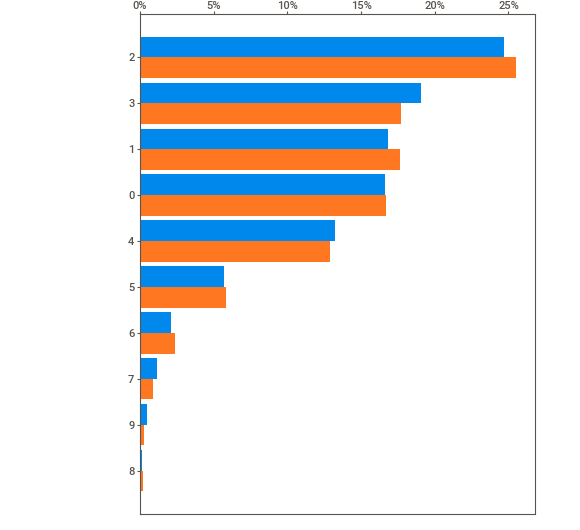
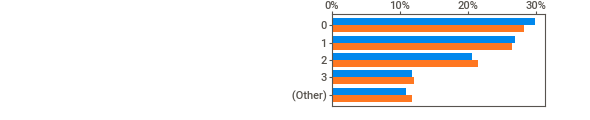
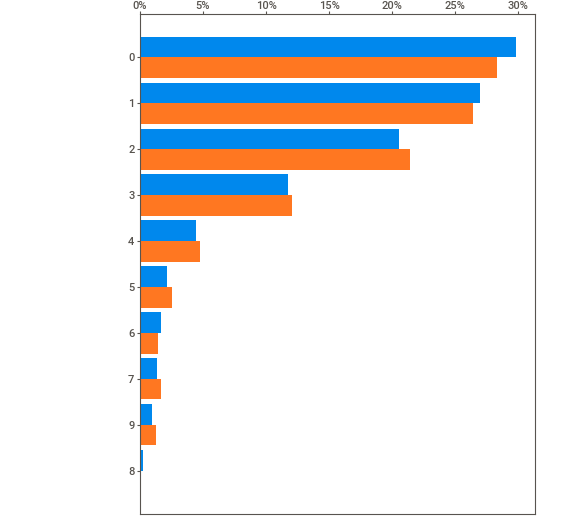
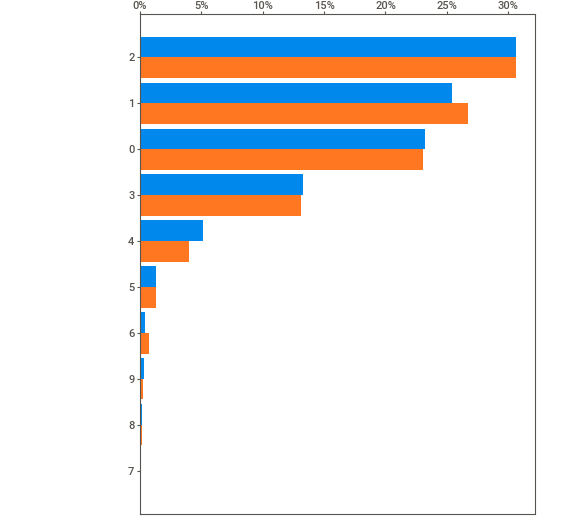
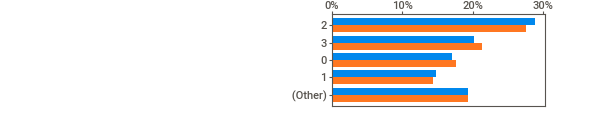
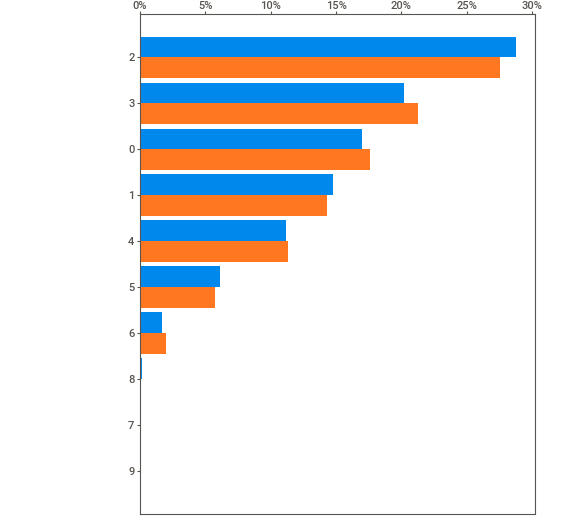
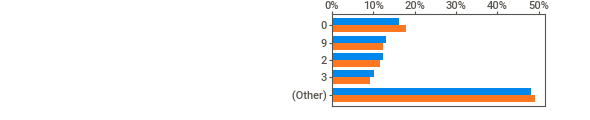
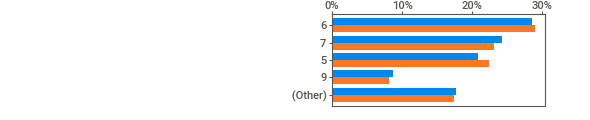
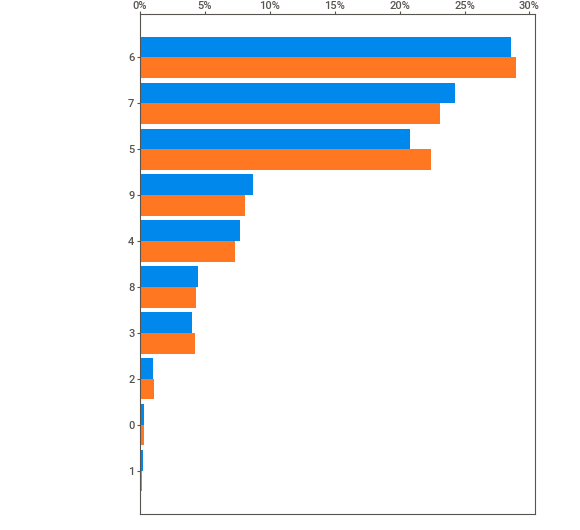
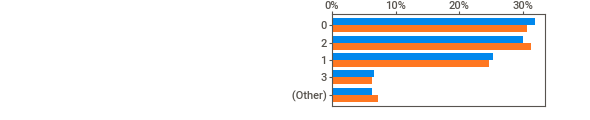
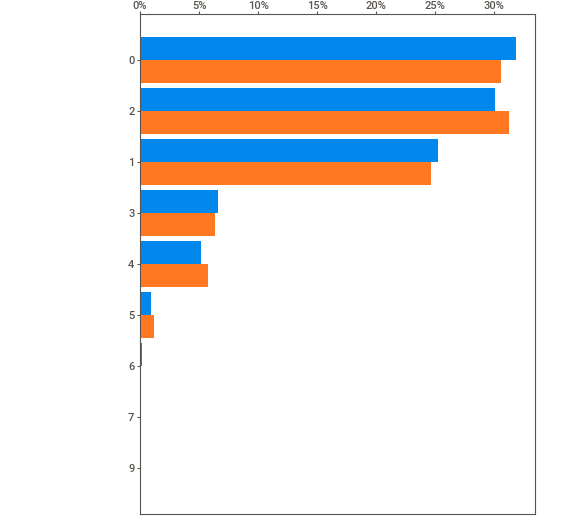
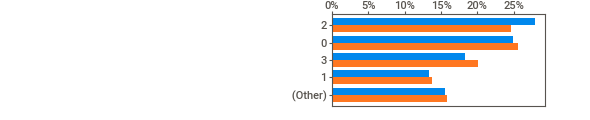
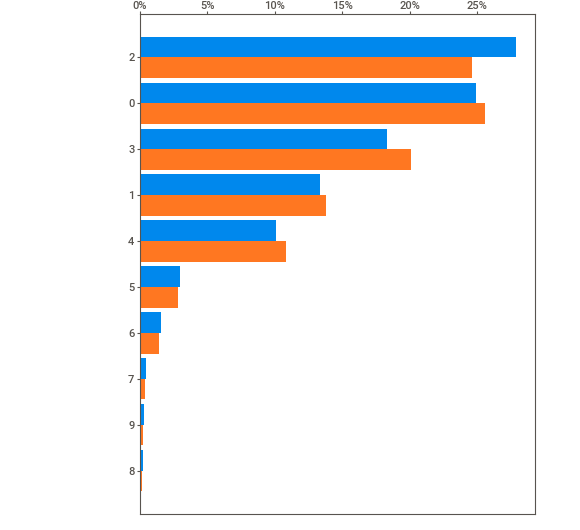
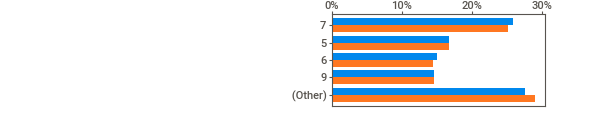
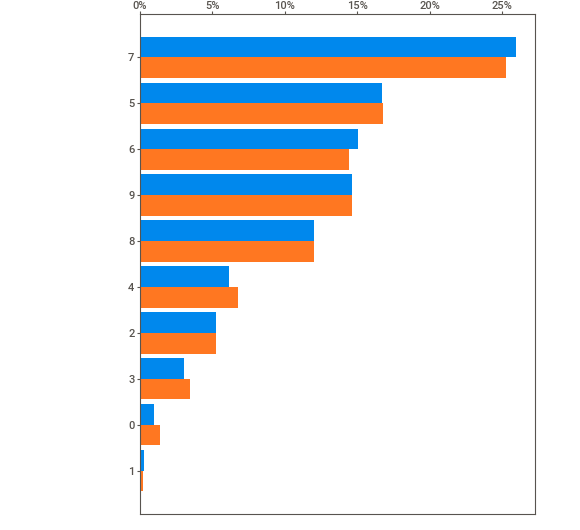
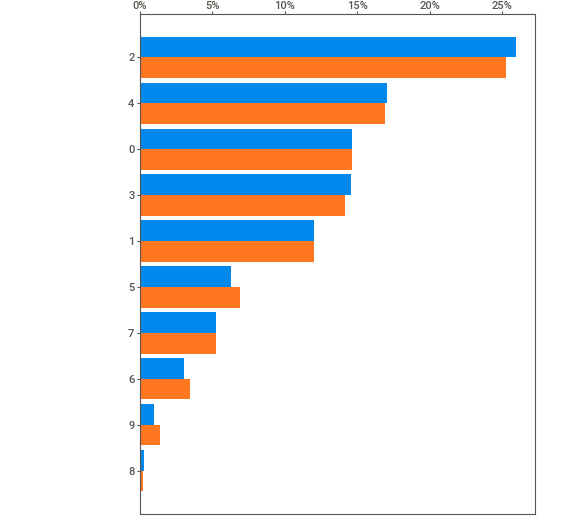
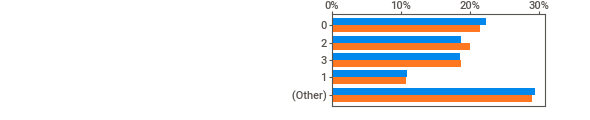
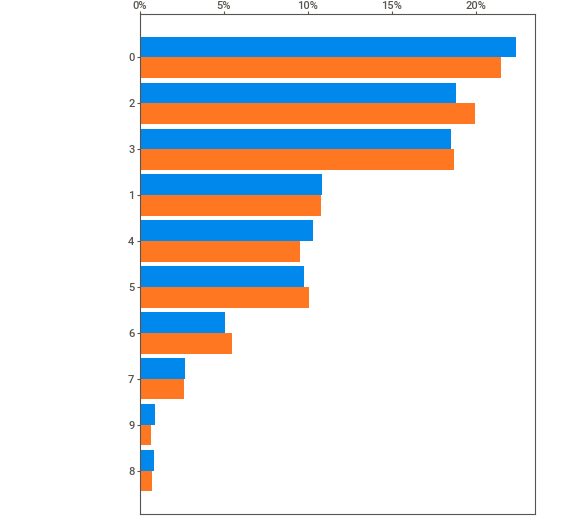
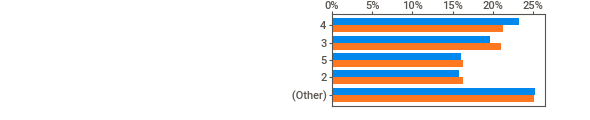
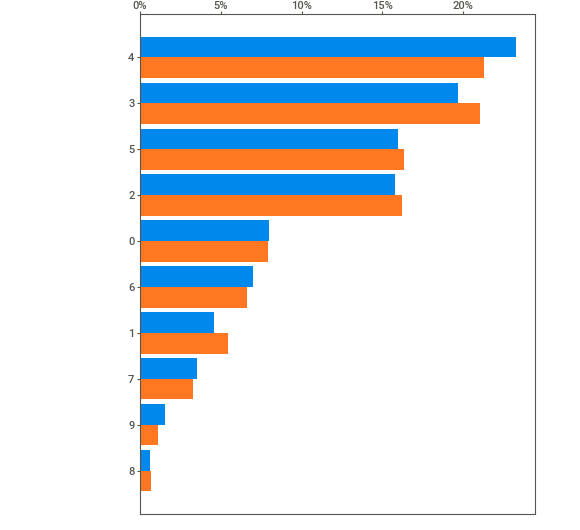
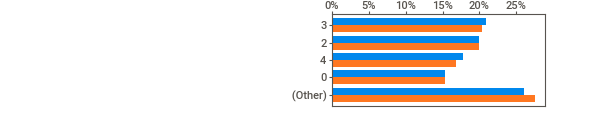
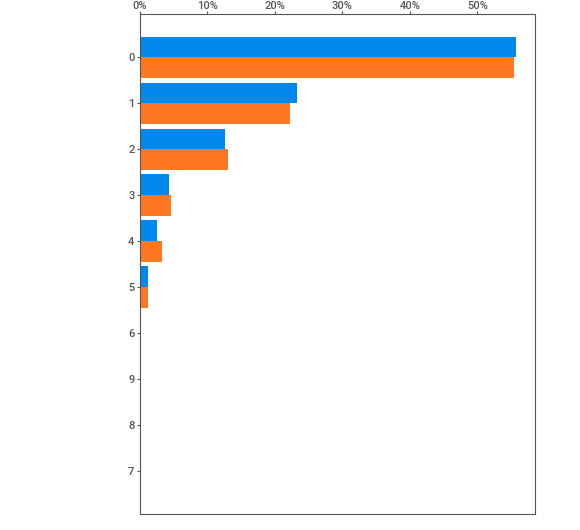
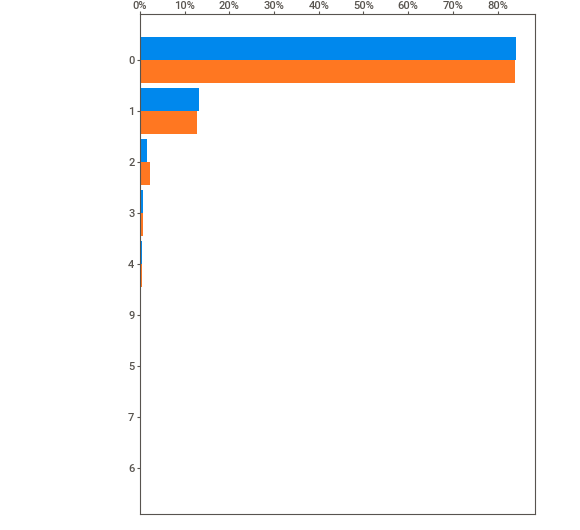
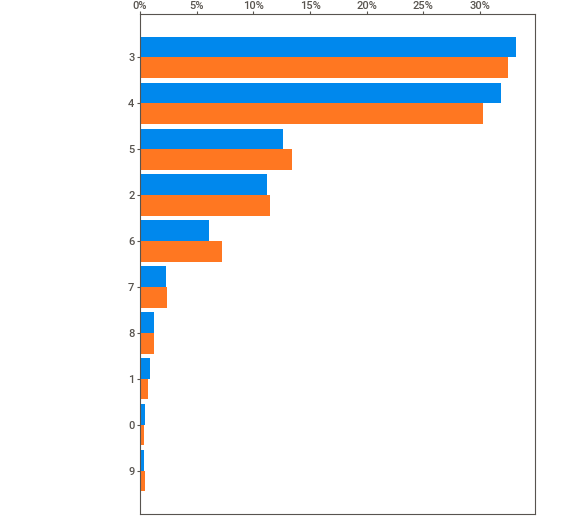
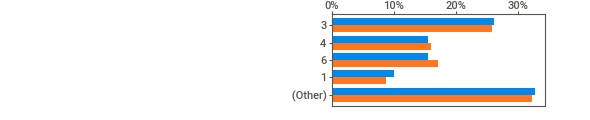
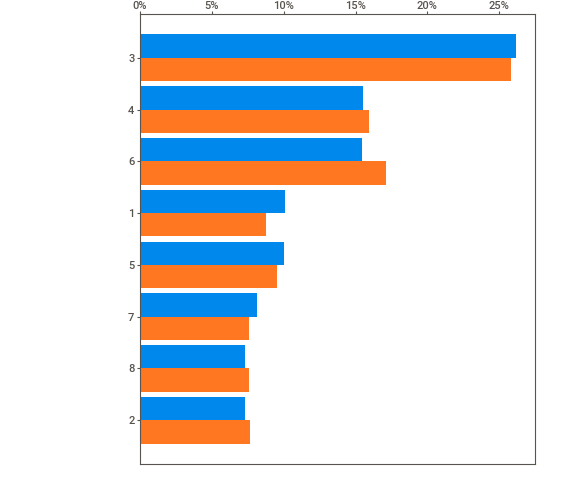
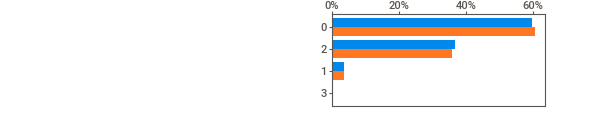
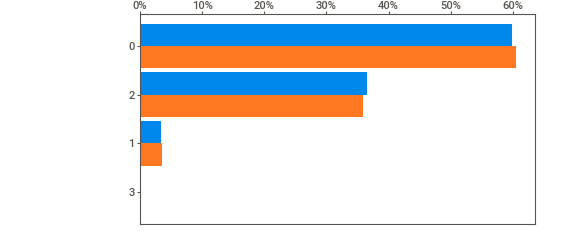
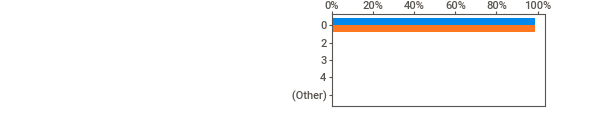
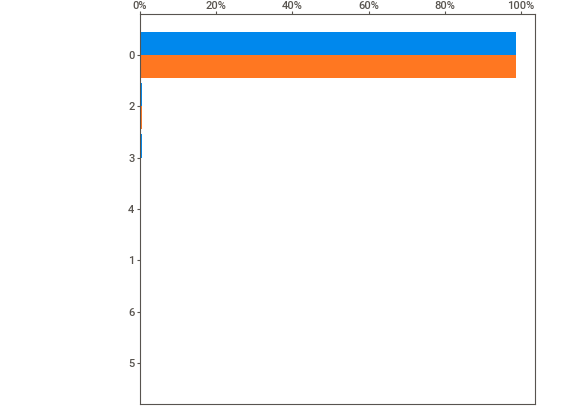
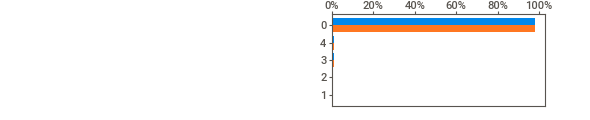
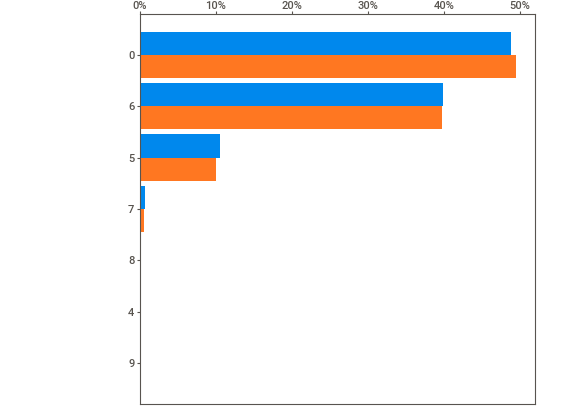
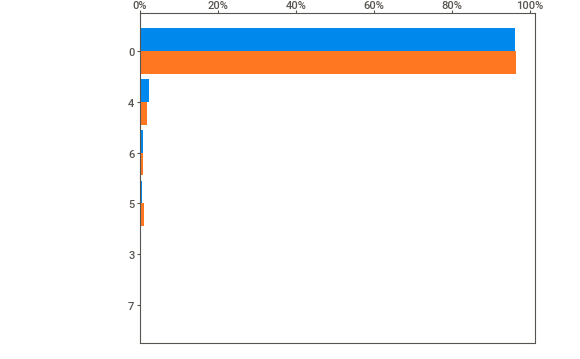
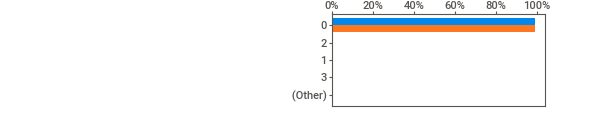
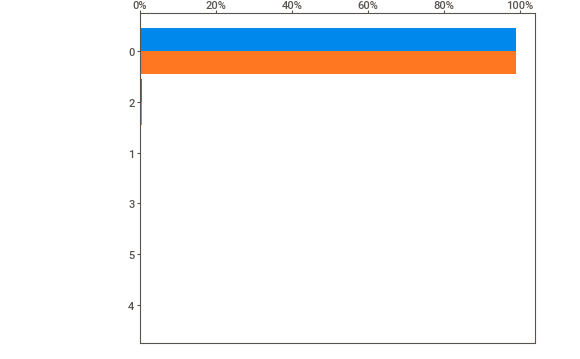
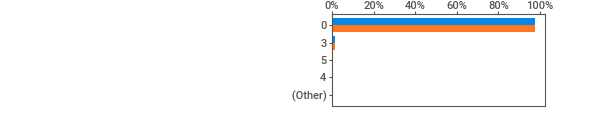
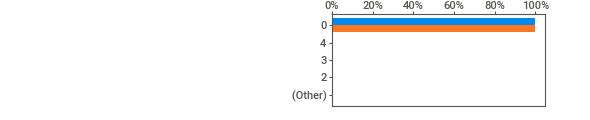
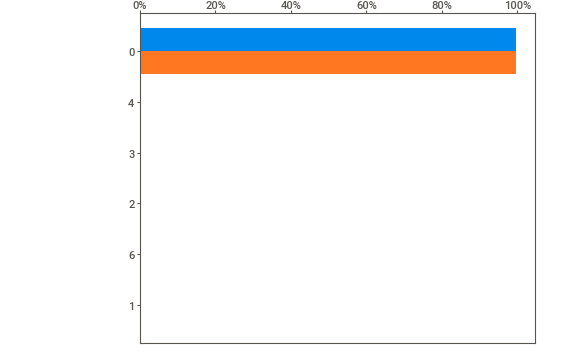
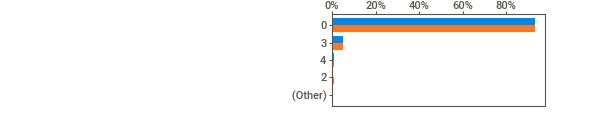
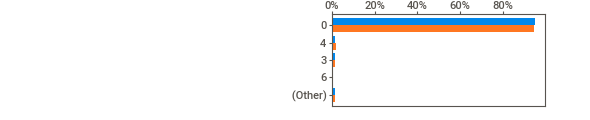
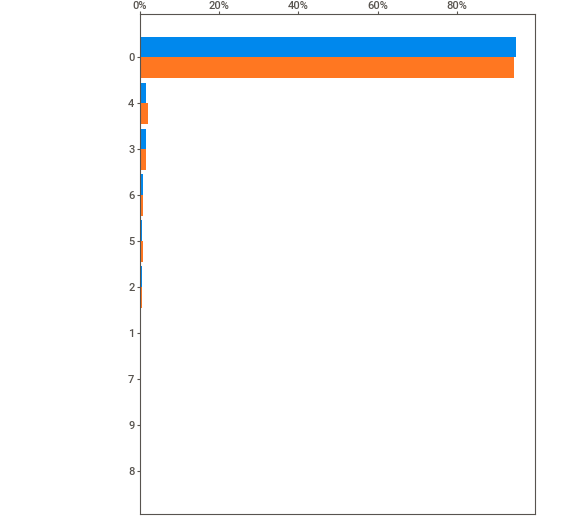
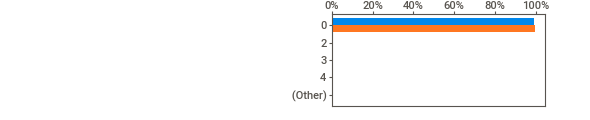
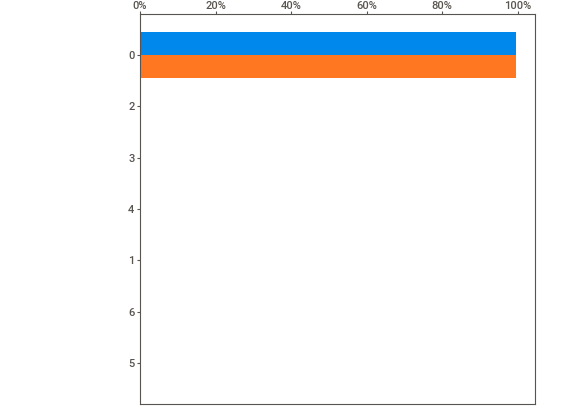
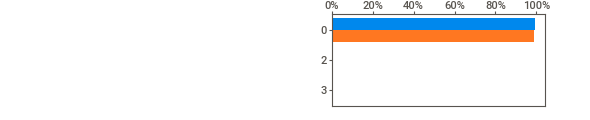
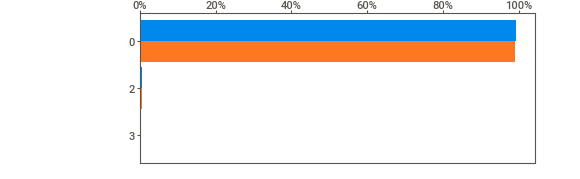
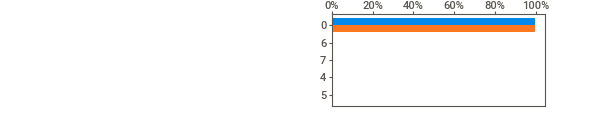
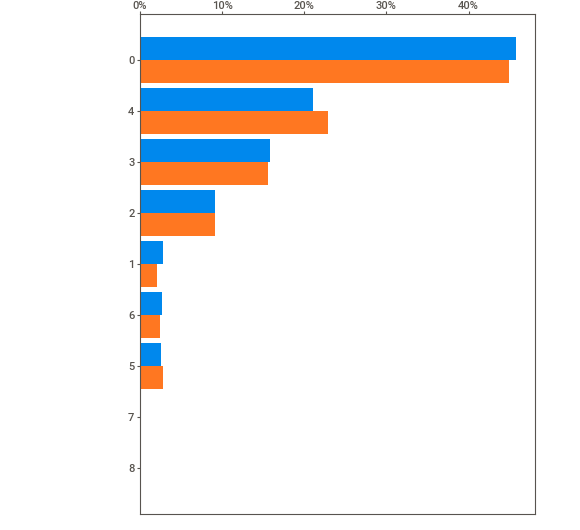
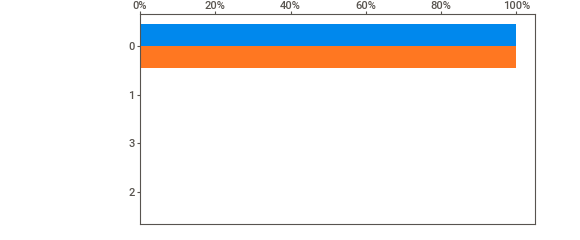
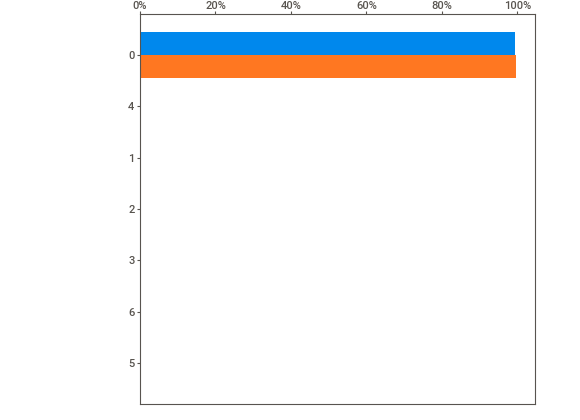
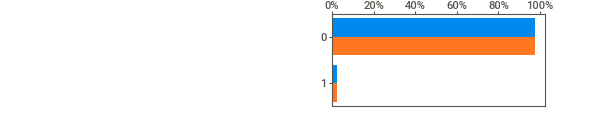
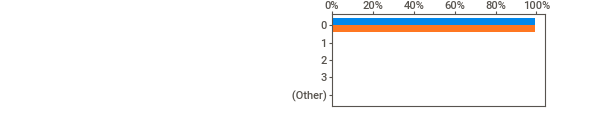
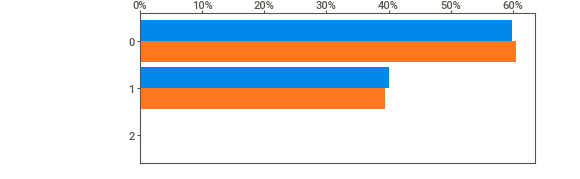
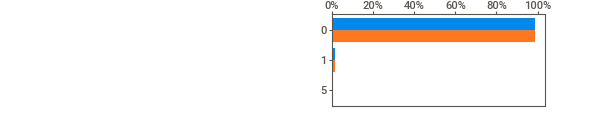
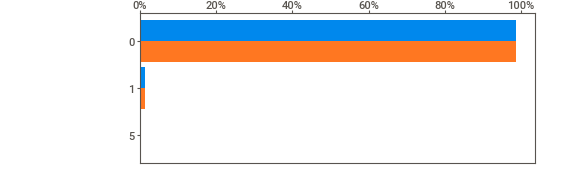
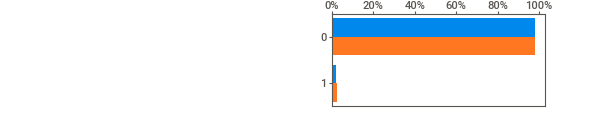
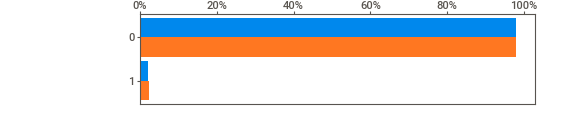
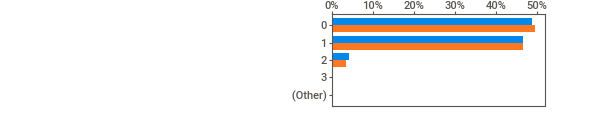
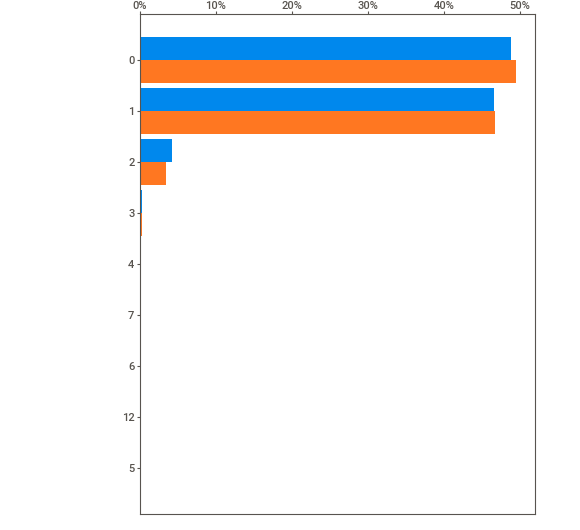
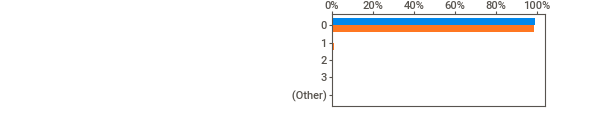
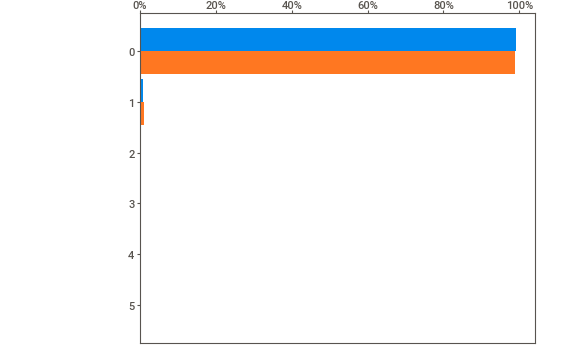
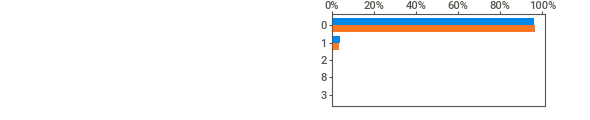
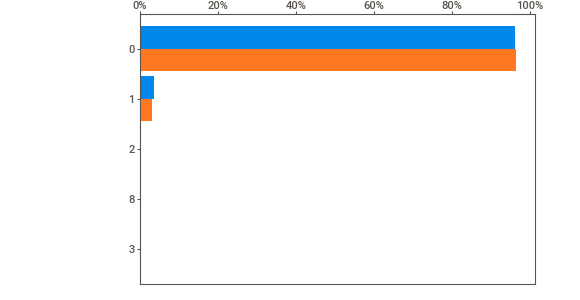
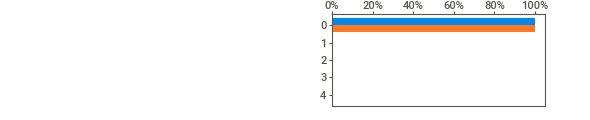
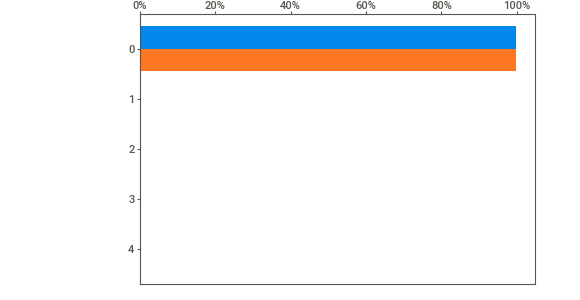
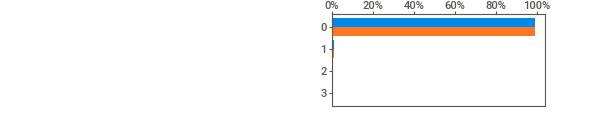
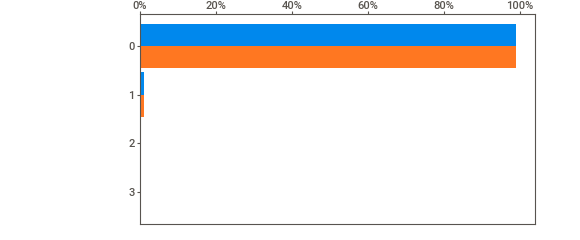
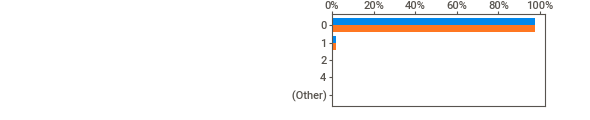
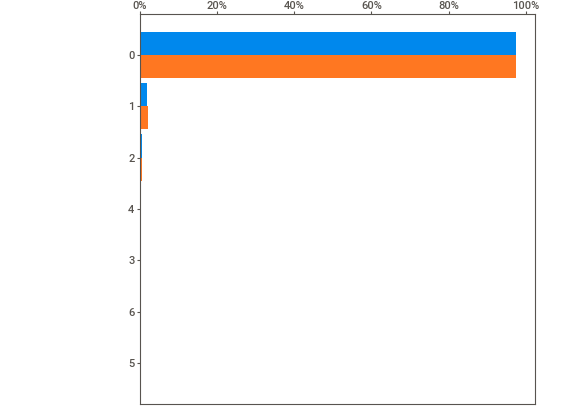
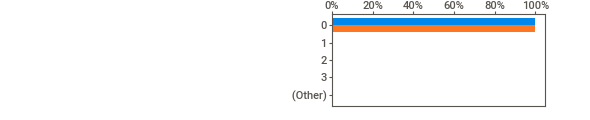
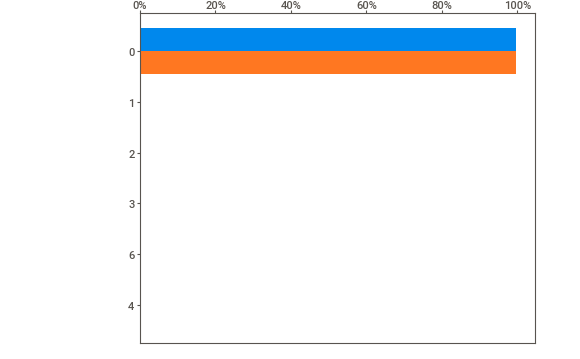
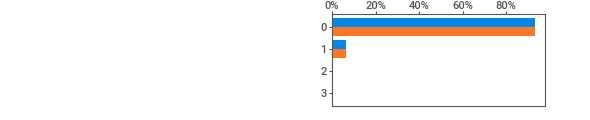
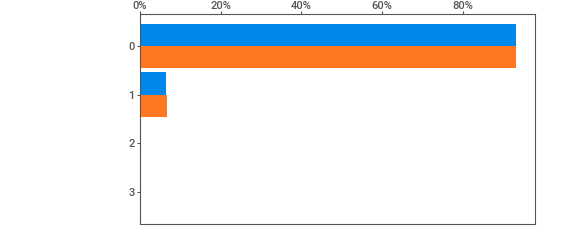
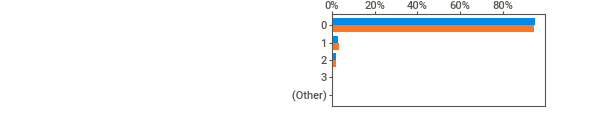
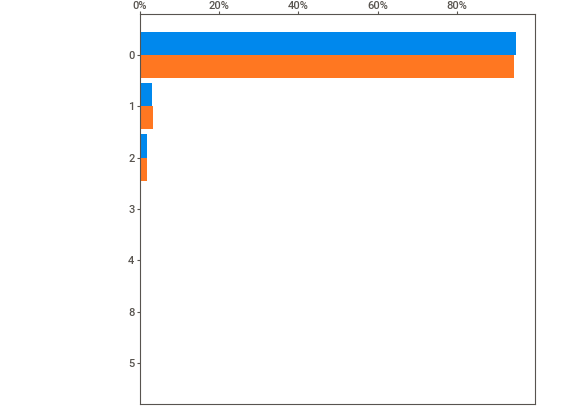
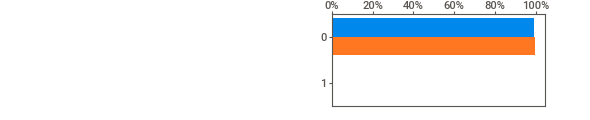
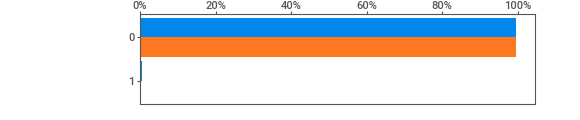
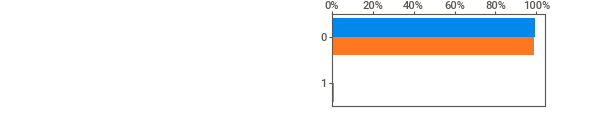
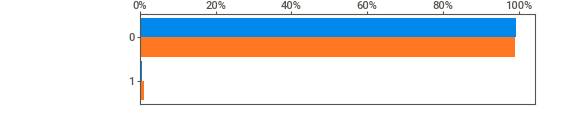
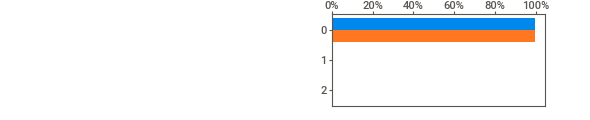
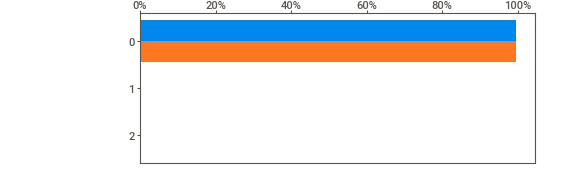
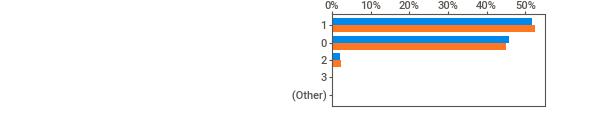
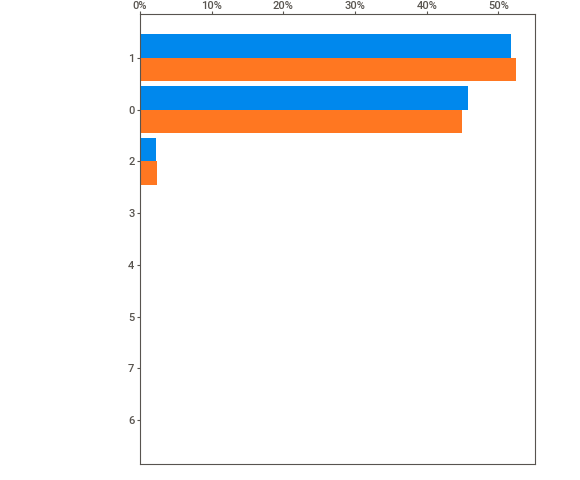
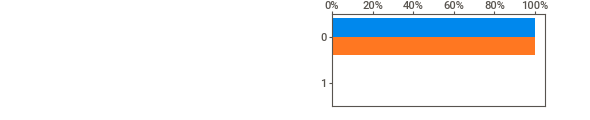
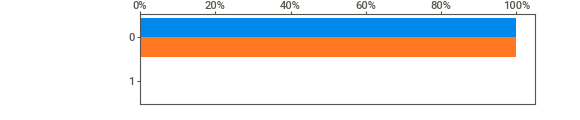
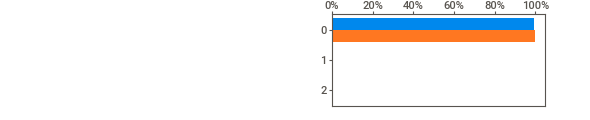
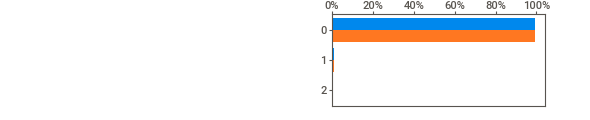
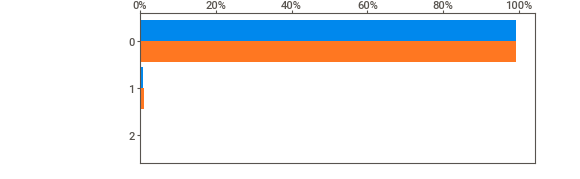
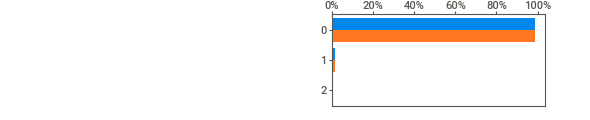
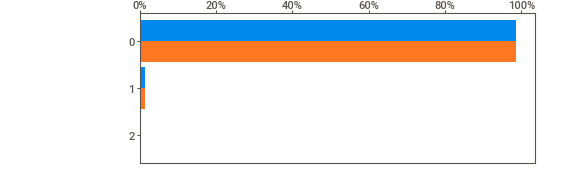
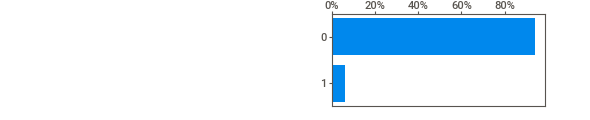
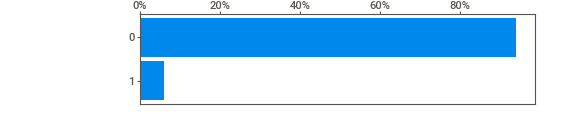
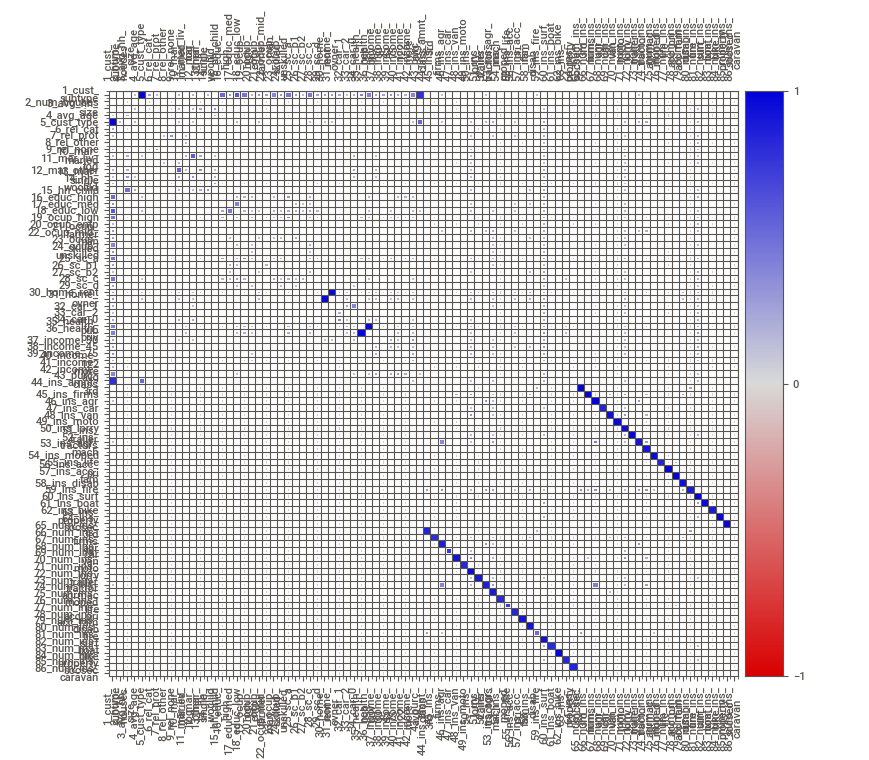
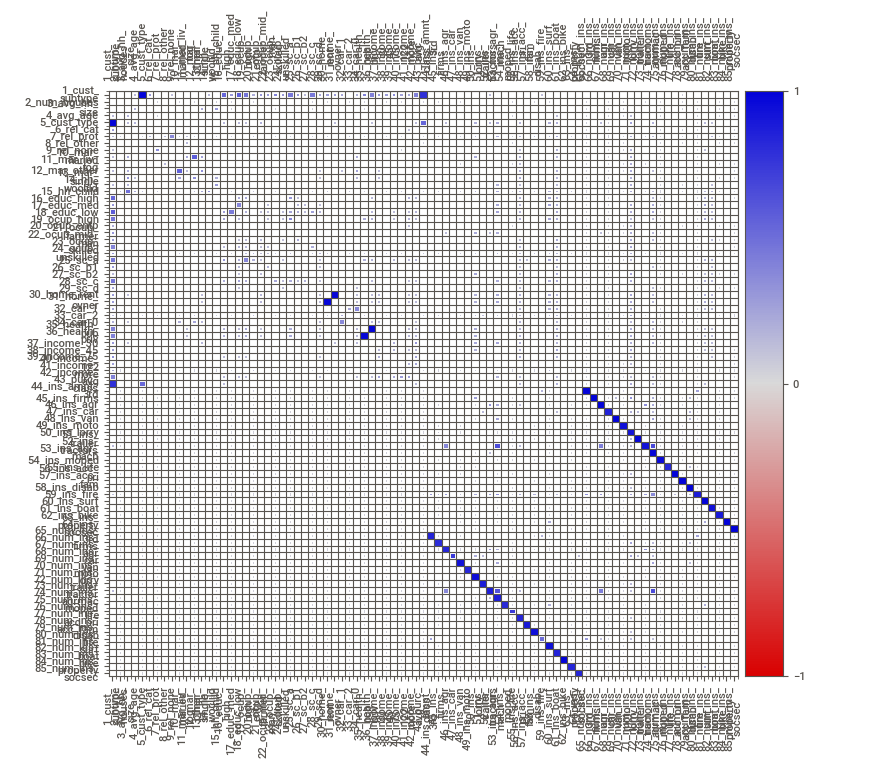

In [20]:
IPython.display.HTML('compare.html')# si no funciona display por favor mirar a HTMLs auxiliares.

Los resultadeos de comparison nos enseño que data_train y data_test son datasets mas o menos similares. data_test se puede utilizar luego para validaciones y predicciones.

In [21]:
data_train.describe()

1_cust_subtype  2_num_houses  3_avg_hh_size    4_avg_age  5_cust_type  \
count     5822.000000   5822.000000    5822.000000  5822.000000  5822.000000   
mean        24.253349      1.110615       2.678805     2.991240     5.773617   
std         12.846706      0.405842       0.789835     0.814589     2.856760   
min          1.000000      1.000000       1.000000     1.000000     1.000000   
25%         10.000000      1.000000       2.000000     2.000000     3.000000   
50%         30.000000      1.000000       3.000000     3.000000     7.000000   
75%         35.000000      1.000000       3.000000     3.000000     8.000000   
max         41.000000     10.000000       5.000000     6.000000    10.000000   

         6_rel_cat   7_rel_prot  8_rel_other   9_rel_none  10_mar_maried  ...  \
count  5822.000000  5822.000000  5822.000000  5822.000000    5822.000000  ...   
mean      0.696496     4.626932     1.069907     3.258502       6.183442  ...   
std       1.003234     1.715843     1.017503     1.597647       1.909482  ...   
min       0.000000     0.000000     0.000000     0.000000       0.000000  ...   
25%       0.000000     4.000000     0.000000     2.000000       5.000000  ...   
50%       0.000000     5.000000     1.000000     3.000000       6.000000  ...   
75%       1.000000     6.000000     2.000000     4.000000       7.000000  ...   
max       9.000000     9.000000     5.000000     9.000000       9.000000  ...   

       77_num_ins_acc_pri  78_num_ins_acc_fam  79_num_ins_disab  \
count         5822.000000         5822.000000       5822.000000   
mean             0.005325            0.006527          0.004638   
std              0.072782            0.080532          0.077403   
min              0.000000            0.000000          0.000000   
25%              0.000000            0.000000          0.000000   
50%              0.000000            0.000000          0.000000   
75%              0.000000            0.000000          0.000000   
max              1.000000            1.000000          2.000000   

       80_num_ins_fire  81_num_ins_surf  82_num_ins_boat  83_num_ins_bike  \
count      5822.000000      5822.000000      5822.000000      5822.000000   
mean          0.570079         0.000515         0.006012         0.031776   
std           0.562058         0.022696         0.081632         0.210986   
min           0.000000         0.000000         0.000000         0.000000   
25%           0.000000         0.000000         0.000000         0.000000   
50%           1.000000         0.000000         0.000000         0.000000   
75%           1.000000         0.000000         0.000000         0.000000   
max           7.000000         1.000000         2.000000         3.000000   

       84_num_ins_property  85_num_ins_socsec  86_num_ins_caravan  
count          5822.000000        5822.000000         5822.000000  
mean              0.007901           0.014256            0.059773  
std               0.090463           0.119996            0.237087  
min               0.000000           0.000000            0.000000  
25%               0.000000           0.000000            0.000000  
50%               0.000000           0.000000            0.000000  
75%               0.000000           0.000000            0.000000  
max               2.000000           2.000000            1.000000  

[8 rows x 86 columns]

In [21]:
corr = data_train.corr(method = 'spearman')

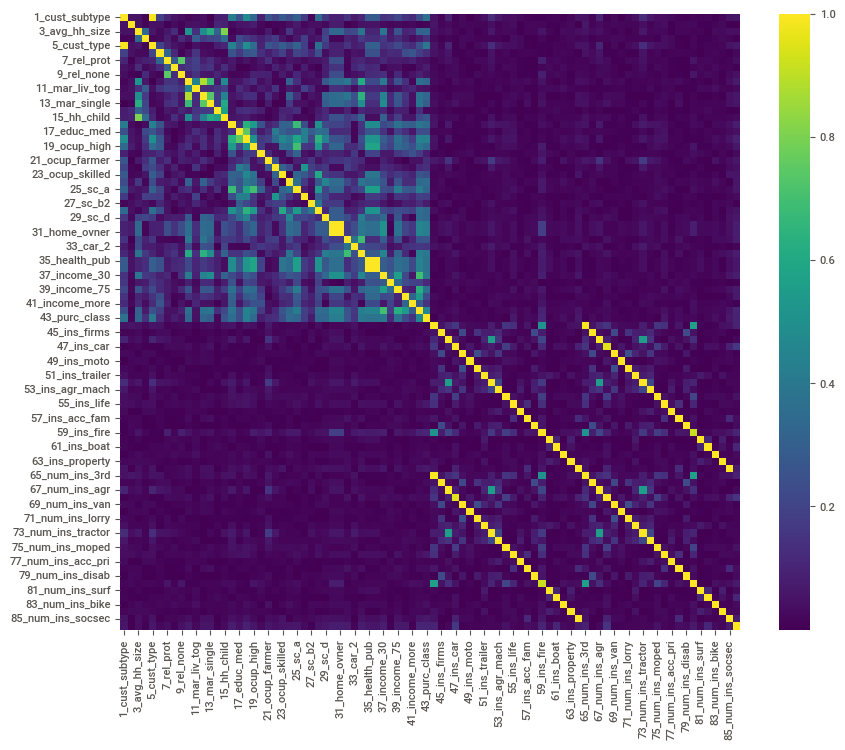

In [22]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr.abs(), cmap ='viridis' )
plt.show()

In [22]:
new_corr = corr.abs()
new_corr.loc[:,:] = np.tril(new_corr, k=-1) 
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)

NameError: name 'corr' is not defined

In [ ]:
new_corr[new_corr.correlation > 0.6].reset_index()

##Com entar

variables 1 -42 son variables de codigo postal. 2-42 enseña distribucion sobre valores socido demograficos esperadas.

podemos concluir valores con alto correlacion enseña que por ejemplo en distrito con parejas casados corelado con parejas casados.
varia categoricas.

Ne vez de hacer una regression con un monton de variables podemos quitar  

Nos da un poco confusion tener tanto variables con alto correlaciones. Añadir variables extras va acastigar cualquier modelo de prediccion.nos da riesgo de overfit. Por eso podemos mirar a los variables con alto correlacion. Como hemos cambiado los nombres, vemos tambien que algunas variables nos conta misma historia con otras palabras. 

Variables en lista de correlacion 0-15 por definicion en dictionario de data; representan misma variacion.  Uno de los columnas se puede quitar:

    
    , 17,18, 20, 22, 23

In [ ]:
l= []
for i in range(45 , 66):
    l.append(data_train.columns(i))
data_train.drop(l, axis=1)    

data_train

  ###Rafa sor nasil drop edecegiz.      

In [ ]:
data_train.drop(list, axis=1)

In [ ]:
Echamos un ojo a variables categoricas.

In [39]:
data_train['86_num_ins_caravan'].groupby(data_train['1_cust_subtype']).mean().sort_values(ascending = False).reset_index()



1_cust_subtype  86_num_ins_caravan
0                8            0.150442
1               12            0.144144
2                1            0.104839
3                6            0.100840
4                3            0.100402
5               20            0.080000
6               37            0.075758
7                2            0.073171
8               13            0.072626
9               36            0.071111
10               7            0.068182
11              38            0.067847
12              11            0.058824
13              39            0.057927
14              33            0.056790
15              32            0.056738
16              10            0.054545
17              34            0.049451
18               5            0.044444
19               9            0.043165
20              22            0.040816
21               4            0.038462
22              35            0.037383
23              30            0.033898
24              31            0.029268
25              24            0.027778
26              41            0.024390
27              25            0.024390
28              29            0.023256
29              26            0.020833
30              27            0.020000
31              23            0.015936
32              18            0.000000
33              19            0.000000
34              17            0.000000
35              16            0.000000
36              15            0.000000
37              28            0.000000
38              40            0.000000
39              21            0.000000

In [36]:
data_train['86_num_ins_caravan'].groupby(data_train['1_cust_subtype']).sort_values(ascending = False).reset_index()

AttributeError: 'SeriesGroupBy' object has no attribute 'sort_values'